# 0. Imports

In [1]:
#imports
import pandas as pd
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 1. Getting the Dataset and PreProcessing

In [2]:
# getting the dataset
df = pd.read_csv('movie_dataset.csv')
df.head()

index     budget                                    genres  \
0      0  237000000  Action Adventure Fantasy Science Fiction   
1      1  300000000                  Adventure Fantasy Action   
2      2  245000000                    Action Adventure Crime   
3      3  250000000               Action Crime Drama Thriller   
4      4  260000000          Action Adventure Science Fiction   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  culture clash future space war space colony so...                en   
1  ocean drug abuse exotic island east india trad...                en   
2         spy based on novel secret agent sequel mi6                en   
3  dc comics crime fighter terrorist secret ident...                en   
4  based on novel mars medallion space travel pri...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  ... runtime  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577  ...   162.0   
1  Captain Barbossa, long believed to be dead, ha...  139.082615  ...   169.0   
2  A cryptic message from Bond’s past sends him o...  107.376788  ...   148.0   
3  Following the death of District Attorney Harve...  112.312950  ...   165.0   
4  John Carter is a war-weary, former military ca...   43.926995  ...   132.0   

                                    spoken_languages    status  \
0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1           [{"iso_639_1": "en", "name": "English"}]  Released   
2  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
3           [{"iso_639_1": "en", "name": "English"}]  Released   
4           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title vote_average vote_count  \
0                                    Avatar          7.2      11800   
1  Pirates of the Caribbean: At World's End          6.9       4500   
2                                   Spectre          6.3       4466   
3                     The Dark Knight Rises          7.6       9106   
4                               John Carter          6.1       2124   

                                                cast  \
0  Sam Worthington Zoe Saldana Sigourney Weaver S...   
1  Johnny Depp Orlando Bloom Keira Knightley Stel...   
2  Daniel Craig Christoph Waltz L\u00e9a Seydoux ...   
3  Christian Bale Michael Caine Gary Oldman Anne ...   
4  Taylor Kitsch Lynn Collins Samantha Morton Wil...   

                                                crew           director  
0  [{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...      James Cameron  
1  [{'name': 'Dariusz Wolski', 'gender': 2, 'depa...     Gore Verbinski  
2  [{'name': 'Thomas Newman', 'gender': 2, 'depar...         Sam Mendes  
3  [{'name': 'Hans Zimmer', 'gender': 2, 'departm...  Christopher Nolan  
4  [{'name': 'Andrew Stanton', 'gender': 2, 'depa...     Andrew Stanton  

[5 rows x 24 columns]

In [3]:
df.isna().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

In [4]:
df = df[['original_title','budget','genres', 'production_companies', 'director']]
df.head()

original_title     budget  \
0                                    Avatar  237000000   
1  Pirates of the Caribbean: At World's End  300000000   
2                                   Spectre  245000000   
3                     The Dark Knight Rises  250000000   
4                               John Carter  260000000   

                                     genres  \
0  Action Adventure Fantasy Science Fiction   
1                  Adventure Fantasy Action   
2                    Action Adventure Crime   
3               Action Crime Drama Thriller   
4          Action Adventure Science Fiction   

                                production_companies           director  
0  [{"name": "Ingenious Film Partners", "id": 289...      James Cameron  
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...     Gore Verbinski  
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...         Sam Mendes  
3  [{"name": "Legendary Pictures", "id": 923}, {"...  Christopher Nolan  
4        [{"name": "Walt Disney Pictures", "id": 2}]     Andrew Stanton

In [5]:
# some of them were 0 which are like outliers 
df = df[df["budget"]>=100000]

In [6]:
df.isna().sum()

original_title          0
budget                  0
genres                  3
production_companies    0
director                6
dtype: int64

In [7]:
# dropping the na rows
df = df.dropna()

## Genre Preprocessing 

In [8]:
# creating a list of genres
genre_list = deepcopy(df['genres'].tolist())
genre_split_list = []
for genres in genre_list:
    try:
        genre_split_list.append( list(genres.split()))
    except:
        print(genres)
        
genre_split_list

[['Action', 'Adventure', 'Fantasy', 'Science', 'Fiction'],
 ['Adventure', 'Fantasy', 'Action'],
 ['Action', 'Adventure', 'Crime'],
 ['Action', 'Crime', 'Drama', 'Thriller'],
 ['Action', 'Adventure', 'Science', 'Fiction'],
 ['Fantasy', 'Action', 'Adventure'],
 ['Animation', 'Family'],
 ['Action', 'Adventure', 'Science', 'Fiction'],
 ['Adventure', 'Fantasy', 'Family'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Adventure', 'Fantasy', 'Action', 'Science', 'Fiction'],
 ['Adventure', 'Action', 'Thriller', 'Crime'],
 ['Adventure', 'Fantasy', 'Action'],
 ['Action', 'Adventure', 'Western'],
 ['Action', 'Adventure', 'Fantasy', 'Science', 'Fiction'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Science', 'Fiction', 'Action', 'Adventure'],
 ['Adventure', 'Action', 'Fantasy'],
 ['Action', 'Comedy', 'Science', 'Fiction'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure'],
 ['Adventure', 'Fantasy'],
 ['Adventure', 'Fantasy'],
 ['Adventure', 'Drama', 'Action']

In [9]:
# getting a set of all genres
all_genres = []
for element in genre_split_list:
    for genre in element:
        all_genres.append(genre)

all_genres = set(all_genres)
all_genres

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Fiction',
 'Foreign',
 'History',
 'Horror',
 'Movie',
 'Music',
 'Mystery',
 'Romance',
 'Science',
 'TV',
 'Thriller',
 'War',
 'Western'}

In [10]:
# removing them because
all_genres.remove('Fiction') # always together with Science "Fiction"
all_genres.remove('Movie')   # always together with TV "Movie"

In [11]:
genre_columns = {}

In [12]:
for genre in all_genres:
    genre_columns[genre] = []
genre_columns

{'Mystery': [],
 'Family': [],
 'Drama': [],
 'Comedy': [],
 'Animation': [],
 'Science': [],
 'Western': [],
 'Romance': [],
 'Foreign': [],
 'History': [],
 'Adventure': [],
 'Action': [],
 'Horror': [],
 'Music': [],
 'Thriller': [],
 'Crime': [],
 'Documentary': [],
 'TV': [],
 'War': [],
 'Fantasy': []}

In [13]:
for split in genre_split_list:
    for gen in all_genres:
        if gen in split:
            genre_columns[gen].append(1)
        else:
            genre_columns[gen].append(0)
    
genre_columns    

{'Mystery': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,

In [14]:
for gen in all_genres:
    df[gen] = genre_columns[gen]

In [15]:
df.head()

original_title     budget  \
0                                    Avatar  237000000   
1  Pirates of the Caribbean: At World's End  300000000   
2                                   Spectre  245000000   
3                     The Dark Knight Rises  250000000   
4                               John Carter  260000000   

                                     genres  \
0  Action Adventure Fantasy Science Fiction   
1                  Adventure Fantasy Action   
2                    Action Adventure Crime   
3               Action Crime Drama Thriller   
4          Action Adventure Science Fiction   

                                production_companies           director  \
0  [{"name": "Ingenious Film Partners", "id": 289...      James Cameron   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...     Gore Verbinski   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...         Sam Mendes   
3  [{"name": "Legendary Pictures", "id": 923}, {"...  Christopher Nolan   
4        [{"name": "Walt Disney Pictures", "id": 2}]     Andrew Stanton   

   Mystery  Family  Drama  Comedy  Animation  ...  Adventure  Action  Horror  \
0        0       0      0       0          0  ...          1       1       0   
1        0       0      0       0          0  ...          1       1       0   
2        0       0      0       0          0  ...          1       1       0   
3        0       0      1       0          0  ...          0       1       0   
4        0       0      0       0          0  ...          1       1       0   

   Music  Thriller  Crime  Documentary  TV  War  Fantasy  
0      0         0      0            0   0    0        1  
1      0         0      0            0   0    0        1  
2      0         0      1            0   0    0        0  
3      0         1      1            0   0    0        0  
4      0         0      0            0   0    0        0  

[5 rows x 25 columns]

## Production Companies PreProcessing

In [16]:
pc = deepcopy(list(df['production_companies'].value_counts().keys()))

In [17]:
production_companies = []
for companies in pc:
    temp = eval(companies)
    temp2 = []
    for c in temp:
        temp2.append(c['name'])
    
    production_companies.append(temp2)
production_companies

[[],
 ['Paramount Pictures'],
 ['Universal Pictures'],
 ['Columbia Pictures'],
 ['New Line Cinema'],
 ['Metro-Goldwyn-Mayer (MGM)'],
 ['Twentieth Century Fox Film Corporation'],
 ['Warner Bros.'],
 ['Walt Disney Pictures'],
 ['Touchstone Pictures'],
 ['Columbia Pictures Corporation'],
 ['Dimension Films'],
 ['DreamWorks Animation'],
 ['Miramax Films'],
 ['Walt Disney Pictures', 'Pixar Animation Studios'],
 ['United Artists'],
 ['Walt Disney Pictures', 'Walt Disney Feature Animation'],
 ['Marvel Studios'],
 ['Blue Sky Studios', 'Twentieth Century Fox Animation'],
 ['Fox 2000 Pictures'],
 ['Imagine Entertainment', 'Universal Pictures'],
 ['United Artists', 'Eon Productions', 'Danjaq'],
 ['Eon Productions'],
 ['Hollywood Pictures', 'Cinergi Pictures Entertainment'],
 ['Fox Searchlight Pictures'],
 ['TriStar Pictures'],
 ['Hollywood Pictures'],
 ['DreamWorks SKG'],
 ['United Artists', 'Eon Productions'],
 ['Silver Pictures', 'Warner Bros.'],
 ['Universal Pictures', 'Amblin Entertainment'],

In [18]:
pc_map = {}
for cs in production_companies:
    for c in cs:
        if c in pc_map:
            pc_map[c] += 1
        else:
            pc_map[c] = 1
pc_map

{'Paramount Pictures': 200,
 'Universal Pictures': 227,
 'Columbia Pictures': 133,
 'New Line Cinema': 111,
 'Metro-Goldwyn-Mayer (MGM)': 74,
 'Twentieth Century Fox Film Corporation': 171,
 'Warner Bros.': 253,
 'Walt Disney Pictures': 60,
 'Touchstone Pictures': 75,
 'Columbia Pictures Corporation': 76,
 'Dimension Films': 32,
 'DreamWorks Animation': 12,
 'Miramax Films': 68,
 'Pixar Animation Studios': 3,
 'United Artists': 45,
 'Walt Disney Feature Animation': 1,
 'Marvel Studios': 6,
 'Blue Sky Studios': 2,
 'Twentieth Century Fox Animation': 4,
 'Fox 2000 Pictures': 41,
 'Imagine Entertainment': 24,
 'Eon Productions': 5,
 'Danjaq': 2,
 'Hollywood Pictures': 13,
 'Cinergi Pictures Entertainment': 5,
 'Fox Searchlight Pictures': 49,
 'TriStar Pictures': 45,
 'DreamWorks SKG': 56,
 'Silver Pictures': 28,
 'Amblin Entertainment': 39,
 'Pacific Data Images (PDI)': 4,
 'Walt Disney Animation Studios': 2,
 'Walt Disney Productions': 3,
 'Sony Pictures Animation': 8,
 'Artisan Entertai

In [19]:
{key: value for key, value in sorted(pc_map.items(), reverse=True, key=lambda item: item[1])}

{'Warner Bros.': 253,
 'Universal Pictures': 227,
 'Paramount Pictures': 200,
 'Twentieth Century Fox Film Corporation': 171,
 'Columbia Pictures': 133,
 'New Line Cinema': 111,
 'Relativity Media': 98,
 'Columbia Pictures Corporation': 76,
 'Touchstone Pictures': 75,
 'Metro-Goldwyn-Mayer (MGM)': 74,
 'Village Roadshow Pictures': 74,
 'Miramax Films': 68,
 'Walt Disney Pictures': 60,
 'Regency Enterprises': 60,
 'Canal+': 58,
 'DreamWorks SKG': 56,
 'Dune Entertainment': 55,
 'Fox Searchlight Pictures': 49,
 'Summit Entertainment': 47,
 'Lionsgate': 46,
 'United Artists': 45,
 'TriStar Pictures': 45,
 'Working Title Films': 44,
 'Fox 2000 Pictures': 41,
 'Amblin Entertainment': 39,
 'StudioCanal': 36,
 'Spyglass Entertainment': 35,
 'Screen Gems': 34,
 'The Weinstein Company': 34,
 'New Regency Pictures': 34,
 'Scott Rudin Productions': 33,
 'Legendary Pictures': 33,
 'Dimension Films': 32,
 'Lakeshore Entertainment': 31,
 'Davis Entertainment': 30,
 'Original Film': 29,
 'Epsilon Mot

In [20]:
df = df.drop(['genres', 'production_companies'], axis=1)
df.head()

original_title     budget           director  \
0                                    Avatar  237000000      James Cameron   
1  Pirates of the Caribbean: At World's End  300000000     Gore Verbinski   
2                                   Spectre  245000000         Sam Mendes   
3                     The Dark Knight Rises  250000000  Christopher Nolan   
4                               John Carter  260000000     Andrew Stanton   

   Mystery  Family  Drama  Comedy  Animation  Science  Western  ...  \
0        0       0      0       0          0        1        0  ...   
1        0       0      0       0          0        0        0  ...   
2        0       0      0       0          0        0        0  ...   
3        0       0      1       0          0        0        0  ...   
4        0       0      0       0          0        1        0  ...   

   Adventure  Action  Horror  Music  Thriller  Crime  Documentary  TV  War  \
0          1       1       0      0         0      0            0   0    0   
1          1       1       0      0         0      0            0   0    0   
2          1       1       0      0         0      1            0   0    0   
3          0       1       0      0         1      1            0   0    0   
4          1       1       0      0         0      0            0   0    0   

   Fantasy  
0        1  
1        1  
2        0  
3        0  
4        0  

[5 rows x 23 columns]

# 2. Analysis

## 2.1 Budget Statistics

In [21]:
# fundamental statistics
df['budget'].describe()

count    3.702000e+03
mean     3.767909e+07
std      4.273560e+07
min      1.000000e+05
25%      9.000000e+06
50%      2.400000e+07
75%      5.000000e+07
max      3.800000e+08
Name: budget, dtype: float64

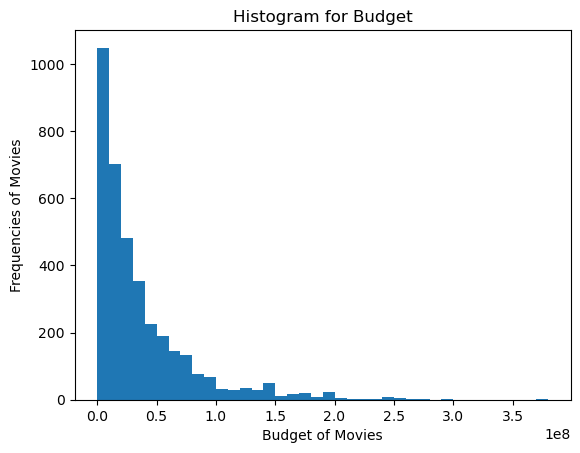

In [22]:
# histogram for budget
fig, ax = plt.subplots()
bin_size = 10000000
ax.hist(df['budget'], bins=range(df['budget'].min(), df['budget'].max() + bin_size, bin_size))
ax.set_title('Histogram for Budget')
ax.set_ylabel('Frequencies of Movies')
ax.set_xlabel('Budget of Movies')

os.makedirs('./diagrams/budget', exist_ok=True)
fig.savefig('./diagrams/budget/budget_histogram.png')

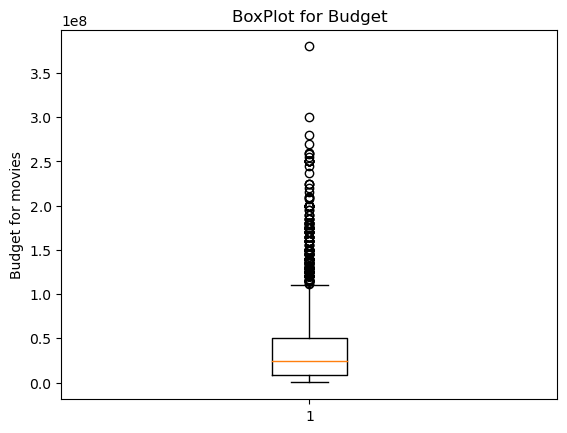

In [23]:
# boxplot for budget
fig, ax = plt.subplots()
bin_size = 10000000
ax.boxplot(df['budget'])
ax.set_title('BoxPlot for Budget')
ax.set_ylabel('Budget for movies')

fig.savefig('./diagrams/budget/budget_boxplot.png');

## 2.2 Genres and Budget

In [24]:
len(all_genres), all_genres

(20,
 {'Action',
  'Adventure',
  'Animation',
  'Comedy',
  'Crime',
  'Documentary',
  'Drama',
  'Family',
  'Fantasy',
  'Foreign',
  'History',
  'Horror',
  'Music',
  'Mystery',
  'Romance',
  'Science',
  'TV',
  'Thriller',
  'War',
  'Western'})

In [25]:
# some fundamental statistics
print("Genre, mean, std, median")
for gen in all_genres:
    print(gen, "{:.3f} {:.3f} {:.3f}".format(df[df[gen]==1]['budget'].mean(), df[df[gen]==1]['budget'].std(), df[df[gen]==1]['budget'].median()))

Genre, mean, std, median
Mystery 36703974.055 33649461.752 27000000.000
Family 63710048.502 52276818.742 50000000.000
Drama 27839532.012 30438703.581 18000000.000
Comedy 33816508.843 33822856.669 24000000.000
Animation 75834247.688 53417132.868 70000000.000
Science 59300894.316 58424445.699 40000000.000
Western 34585212.516 47402177.148 17000000.000
Romance 27012370.626 26325483.977 19000000.000
Foreign 2425000.000 2171261.154 1400000.000
History 35487848.982 33775340.908 25000000.000
Adventure 73079805.344 62032454.161 55000000.000
Action 58980213.745 55246680.030 40000000.000
Horror 19493369.054 23299537.529 12000000.000
Music 22022330.414 21291476.462 15000000.000
Thriller 38209139.667 38063547.876 26000000.000
Crime 32964513.485 31925529.617 25000000.000
Documentary 5951845.000 10372655.429 2000000.000
TV 3066666.667 1792577.288 4000000.000
War 38609875.000 36954087.670 25000000.000
Fantasy 72186510.397 62438466.783 55000000.000


C:\Users\DeepKumar_Patel\AppData\Local\Temp\ipykernel_52552\1220974994.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  correlation_matrix = df[all_genres].corr()


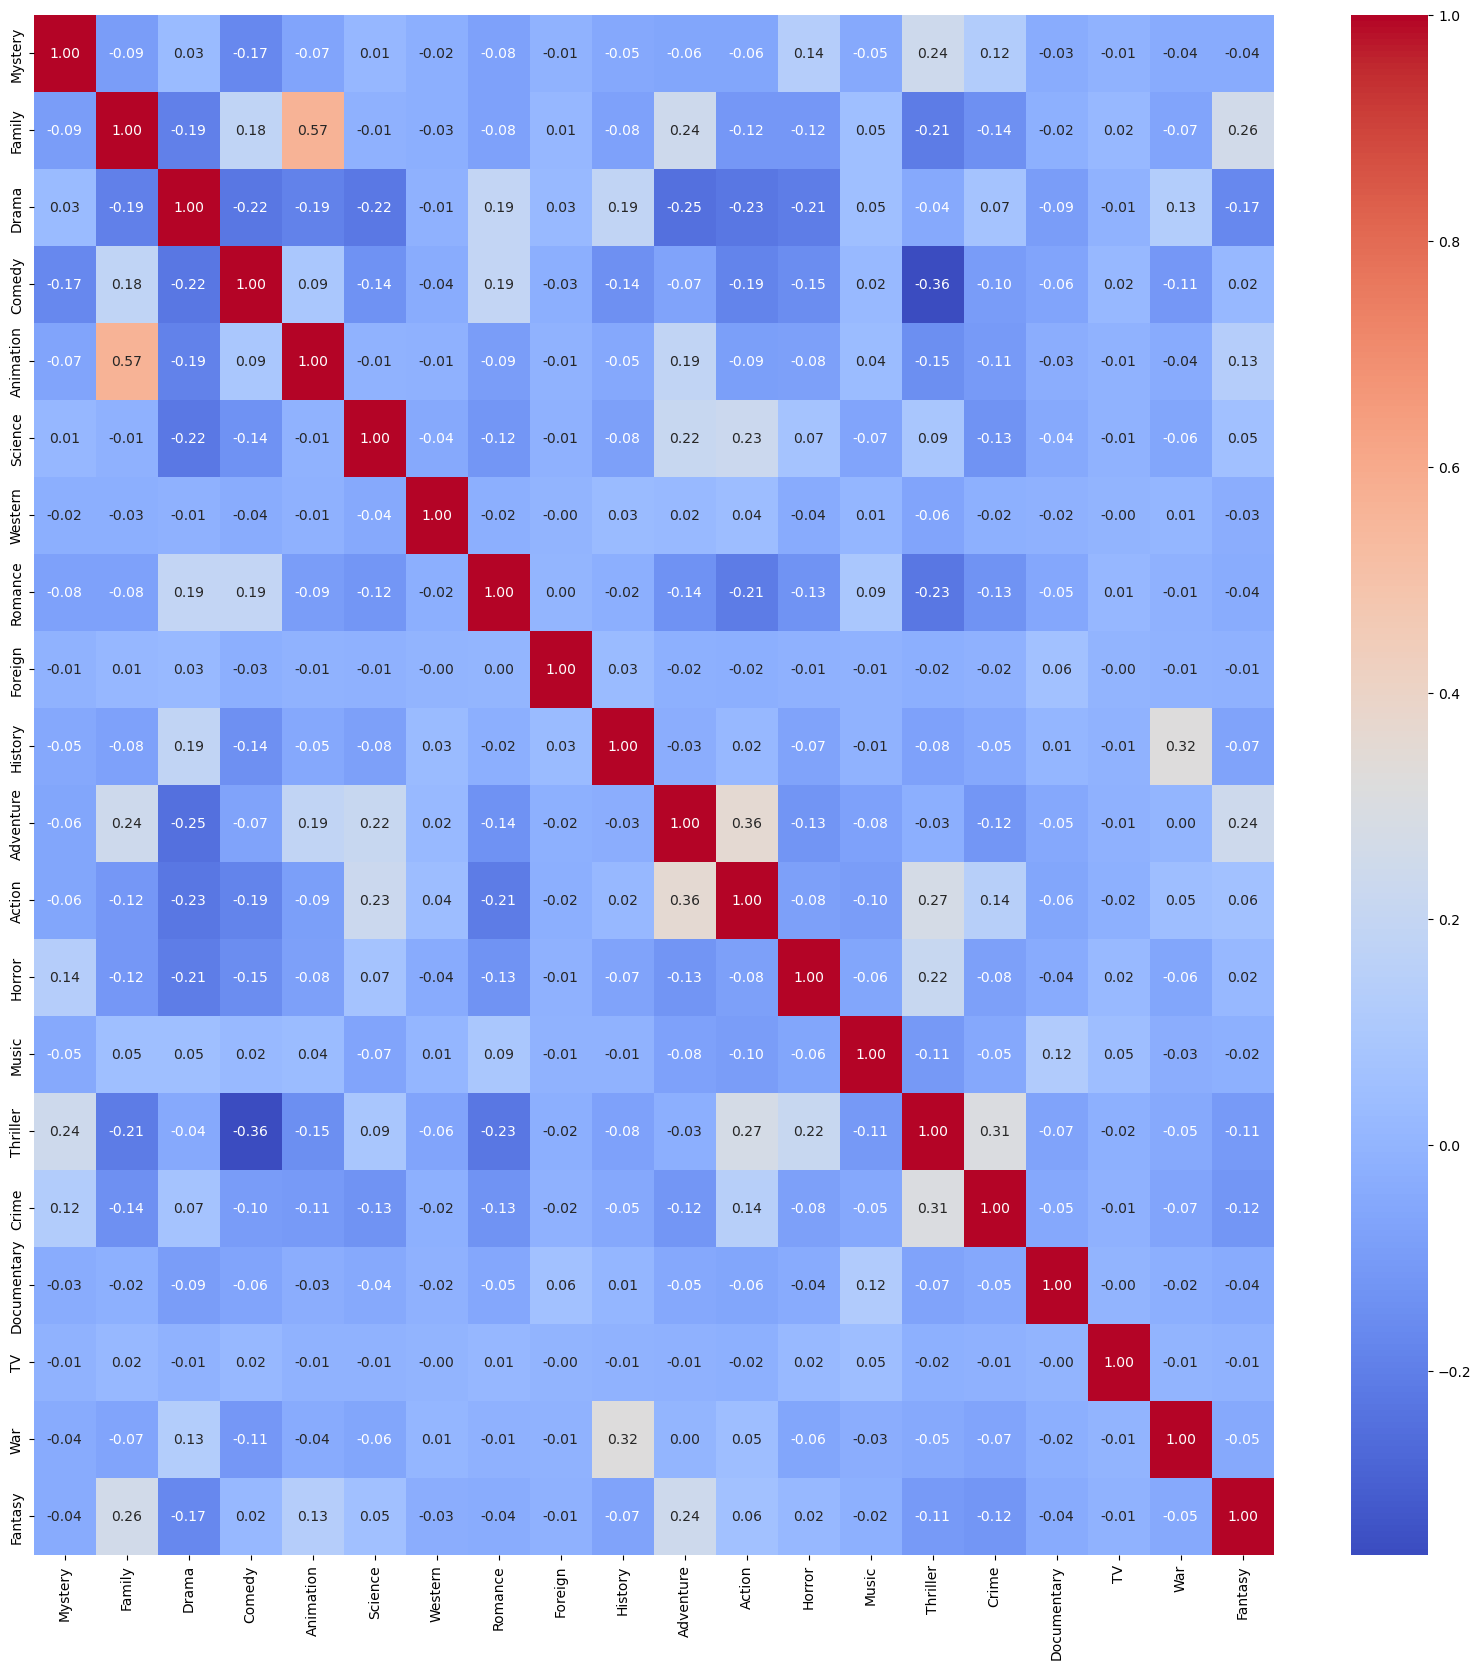

In [26]:
# correlation matrix

correlation_matrix = df[all_genres].corr()
fig, ax = plt.subplots(figsize=(20, 20))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)

# Display the plot
os.makedirs('./diagrams/genres', exist_ok=True)
plt.savefig('./diagrams/genres/correlation_matrix_plot.png')

In [27]:
# genre and count histogram
genre_count = {}
for gen in all_genres:
    genre_count[gen] = df[gen].sum()
genre_count = sorted_dict_asc = dict(sorted(genre_count.items(), key=lambda item: item[1]))
genre_count

{'TV': 3,
 'Foreign': 5,
 'Documentary': 49,
 'Western': 64,
 'War': 129,
 'Music': 133,
 'History': 166,
 'Animation': 205,
 'Mystery': 291,
 'Fantasy': 368,
 'Horror': 388,
 'Family': 404,
 'Science': 465,
 'Crime': 588,
 'Romance': 665,
 'Adventure': 717,
 'Action': 1007,
 'Thriller': 1048,
 'Comedy': 1289,
 'Drama': 1706}

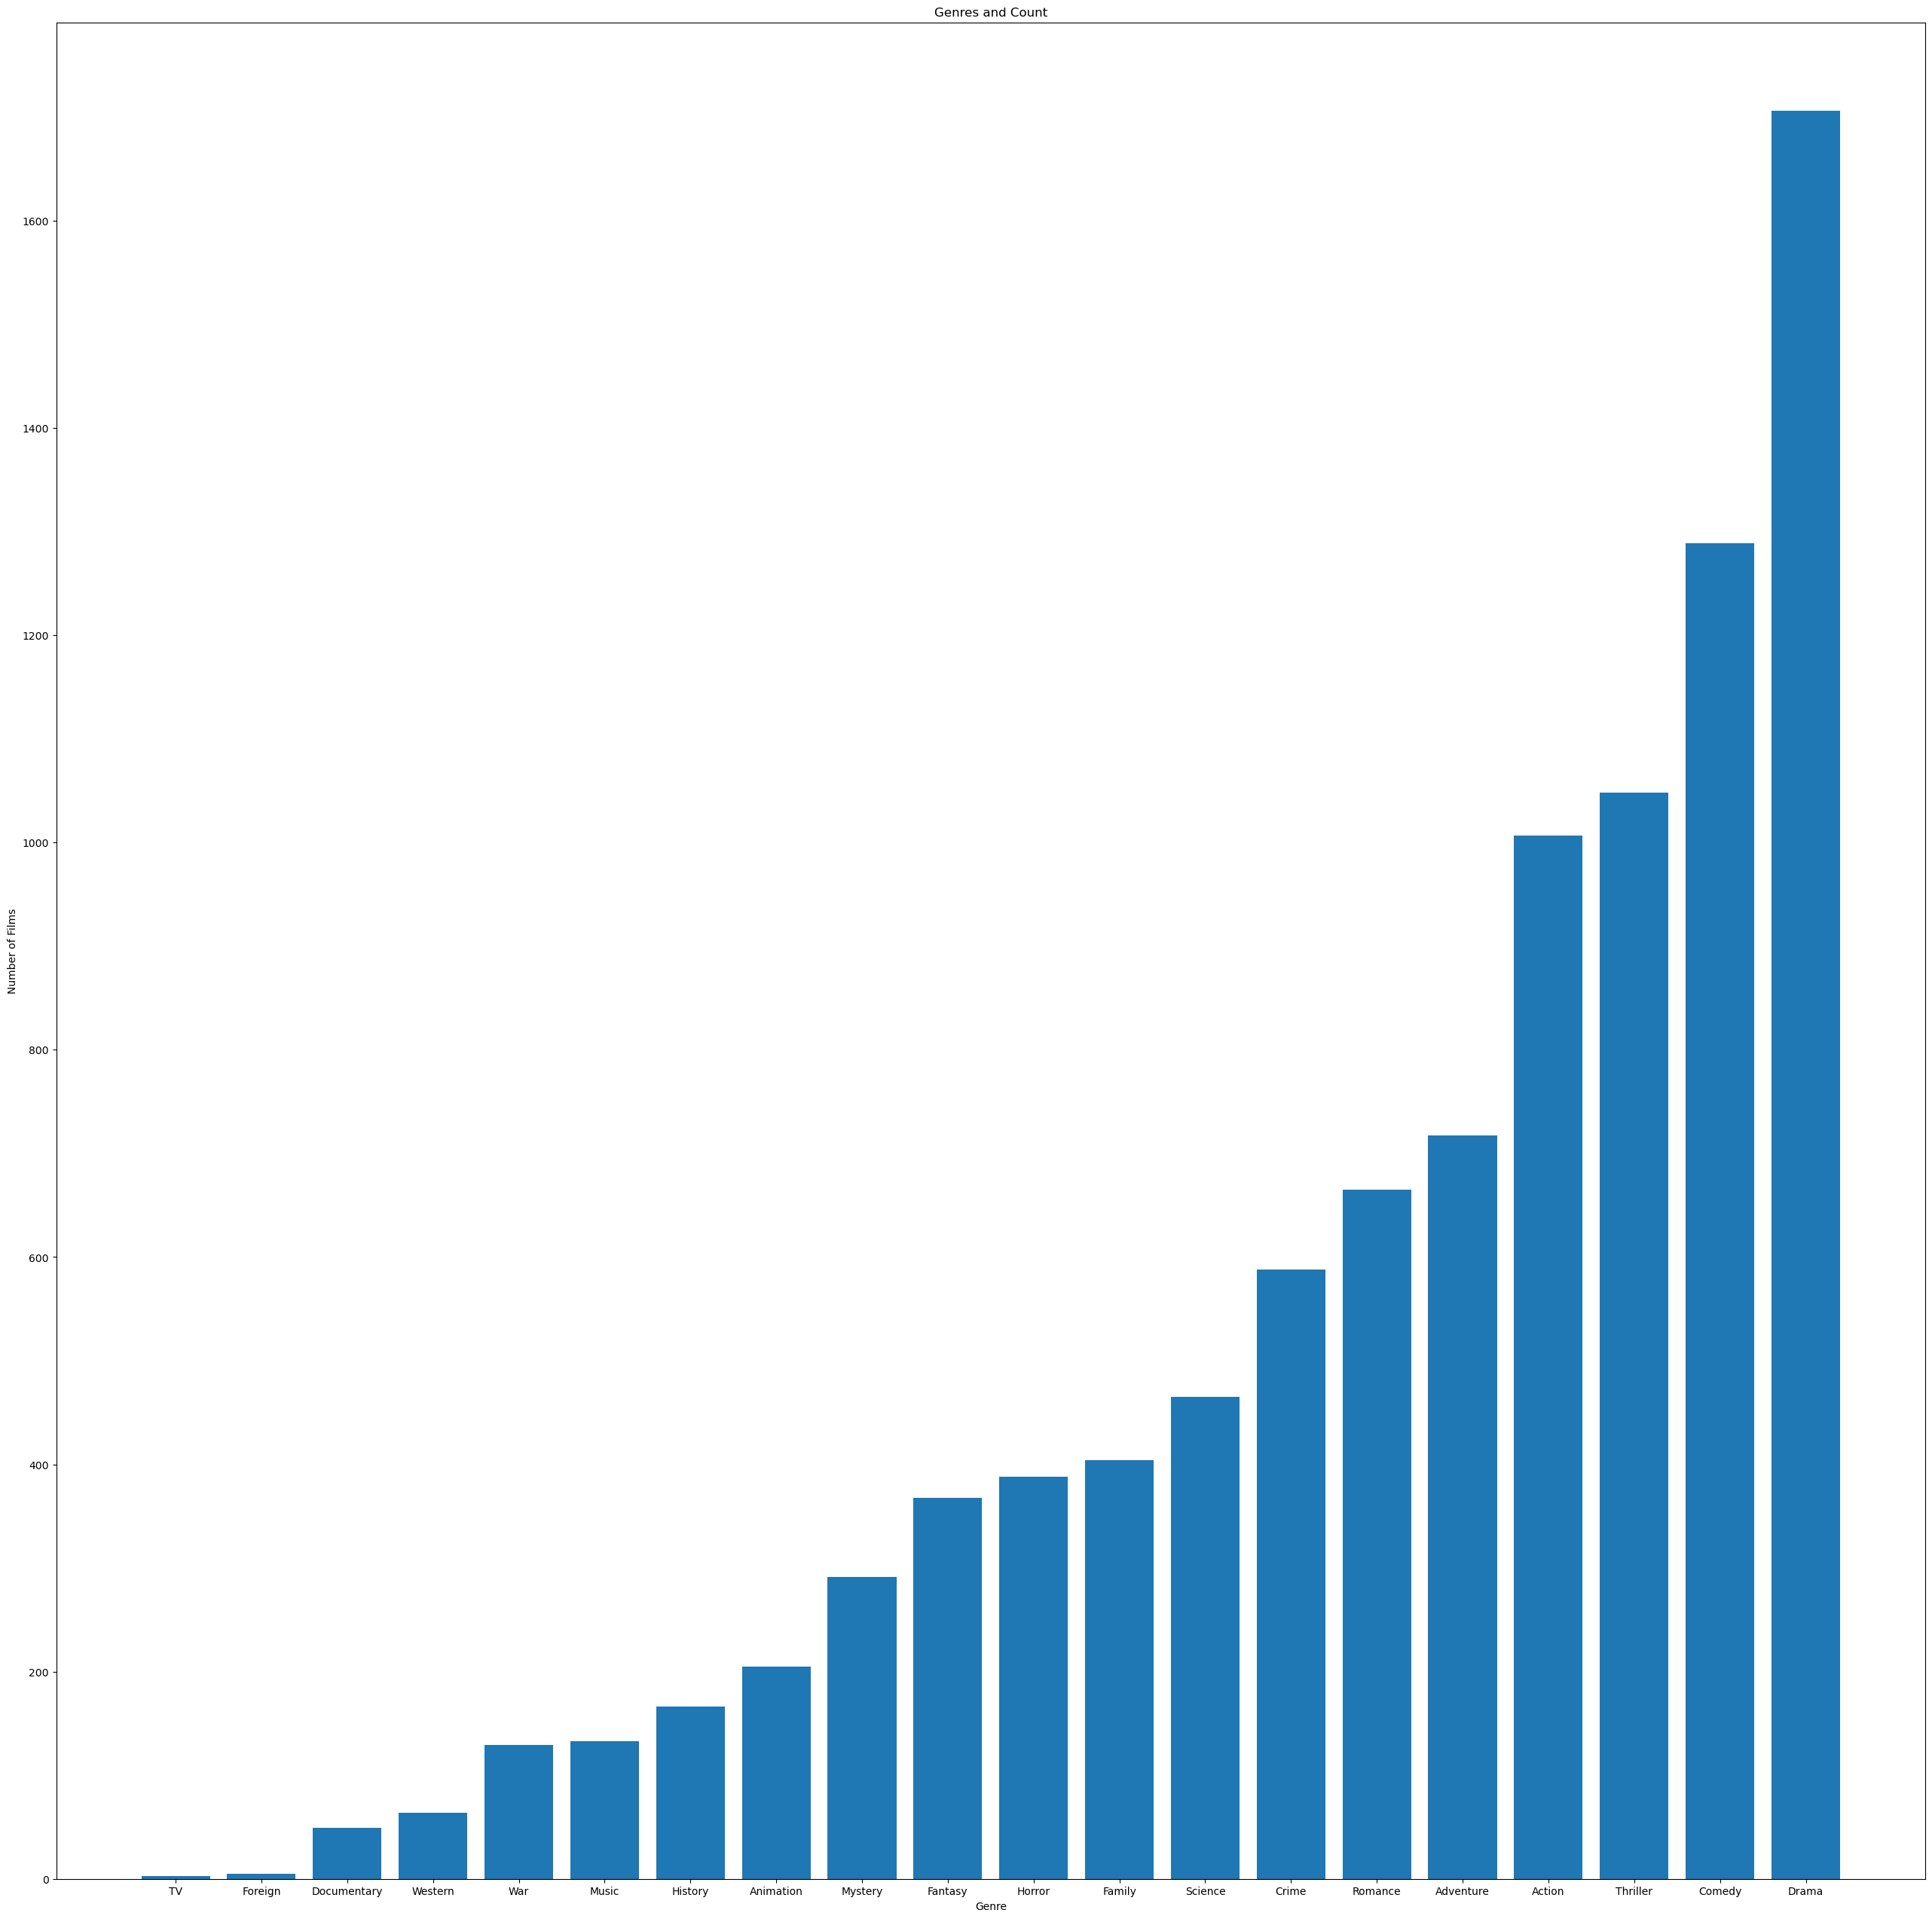

In [28]:
import matplotlib.pyplot as plt

# Sample dictionary with data
data_dict = genre_count

# Extracting keys and values from the dictionary
labels = list(data_dict.keys())
values = list(data_dict.values())

# Creating a figure and axis
fig, ax = plt.subplots(figsize=(32,32))

# Creating a bar chart using the axis
ax.bar(labels, values)

# Adding labels and title
ax.set_xlabel('Genre')
ax.set_ylabel('Number of Films')
ax.set_title('Genres and Count')

# Displaying the bar chart
fig.savefig('./diagrams/genres/genre_count.png')


In [29]:
# df[df['Thriller']==1]["budget"].mean()

In [30]:
# genre and mean budget barchart
genre_mean = {}
for gen in all_genres:
    genre_mean[gen] = df[df[gen]==1]['budget'].mean()
genre_mean = sorted_dict_asc = dict(sorted(genre_mean.items(), key=lambda item: item[1]))
genre_mean

{'Foreign': 2425000.0,
 'TV': 3066666.6666666665,
 'Documentary': 5951845.0,
 'Horror': 19493369.05412371,
 'Music': 22022330.413533833,
 'Romance': 27012370.62556391,
 'Drama': 27839532.012309495,
 'Crime': 32964513.484693877,
 'Comedy': 33816508.842513576,
 'Western': 34585212.515625,
 'History': 35487848.98192771,
 'Mystery': 36703974.05498282,
 'Thriller': 38209139.66698473,
 'War': 38609875.0,
 'Action': 58980213.74478649,
 'Science': 59300894.31612903,
 'Family': 63710048.50247525,
 'Fantasy': 72186510.39673913,
 'Adventure': 73079805.34449093,
 'Animation': 75834247.68780488}

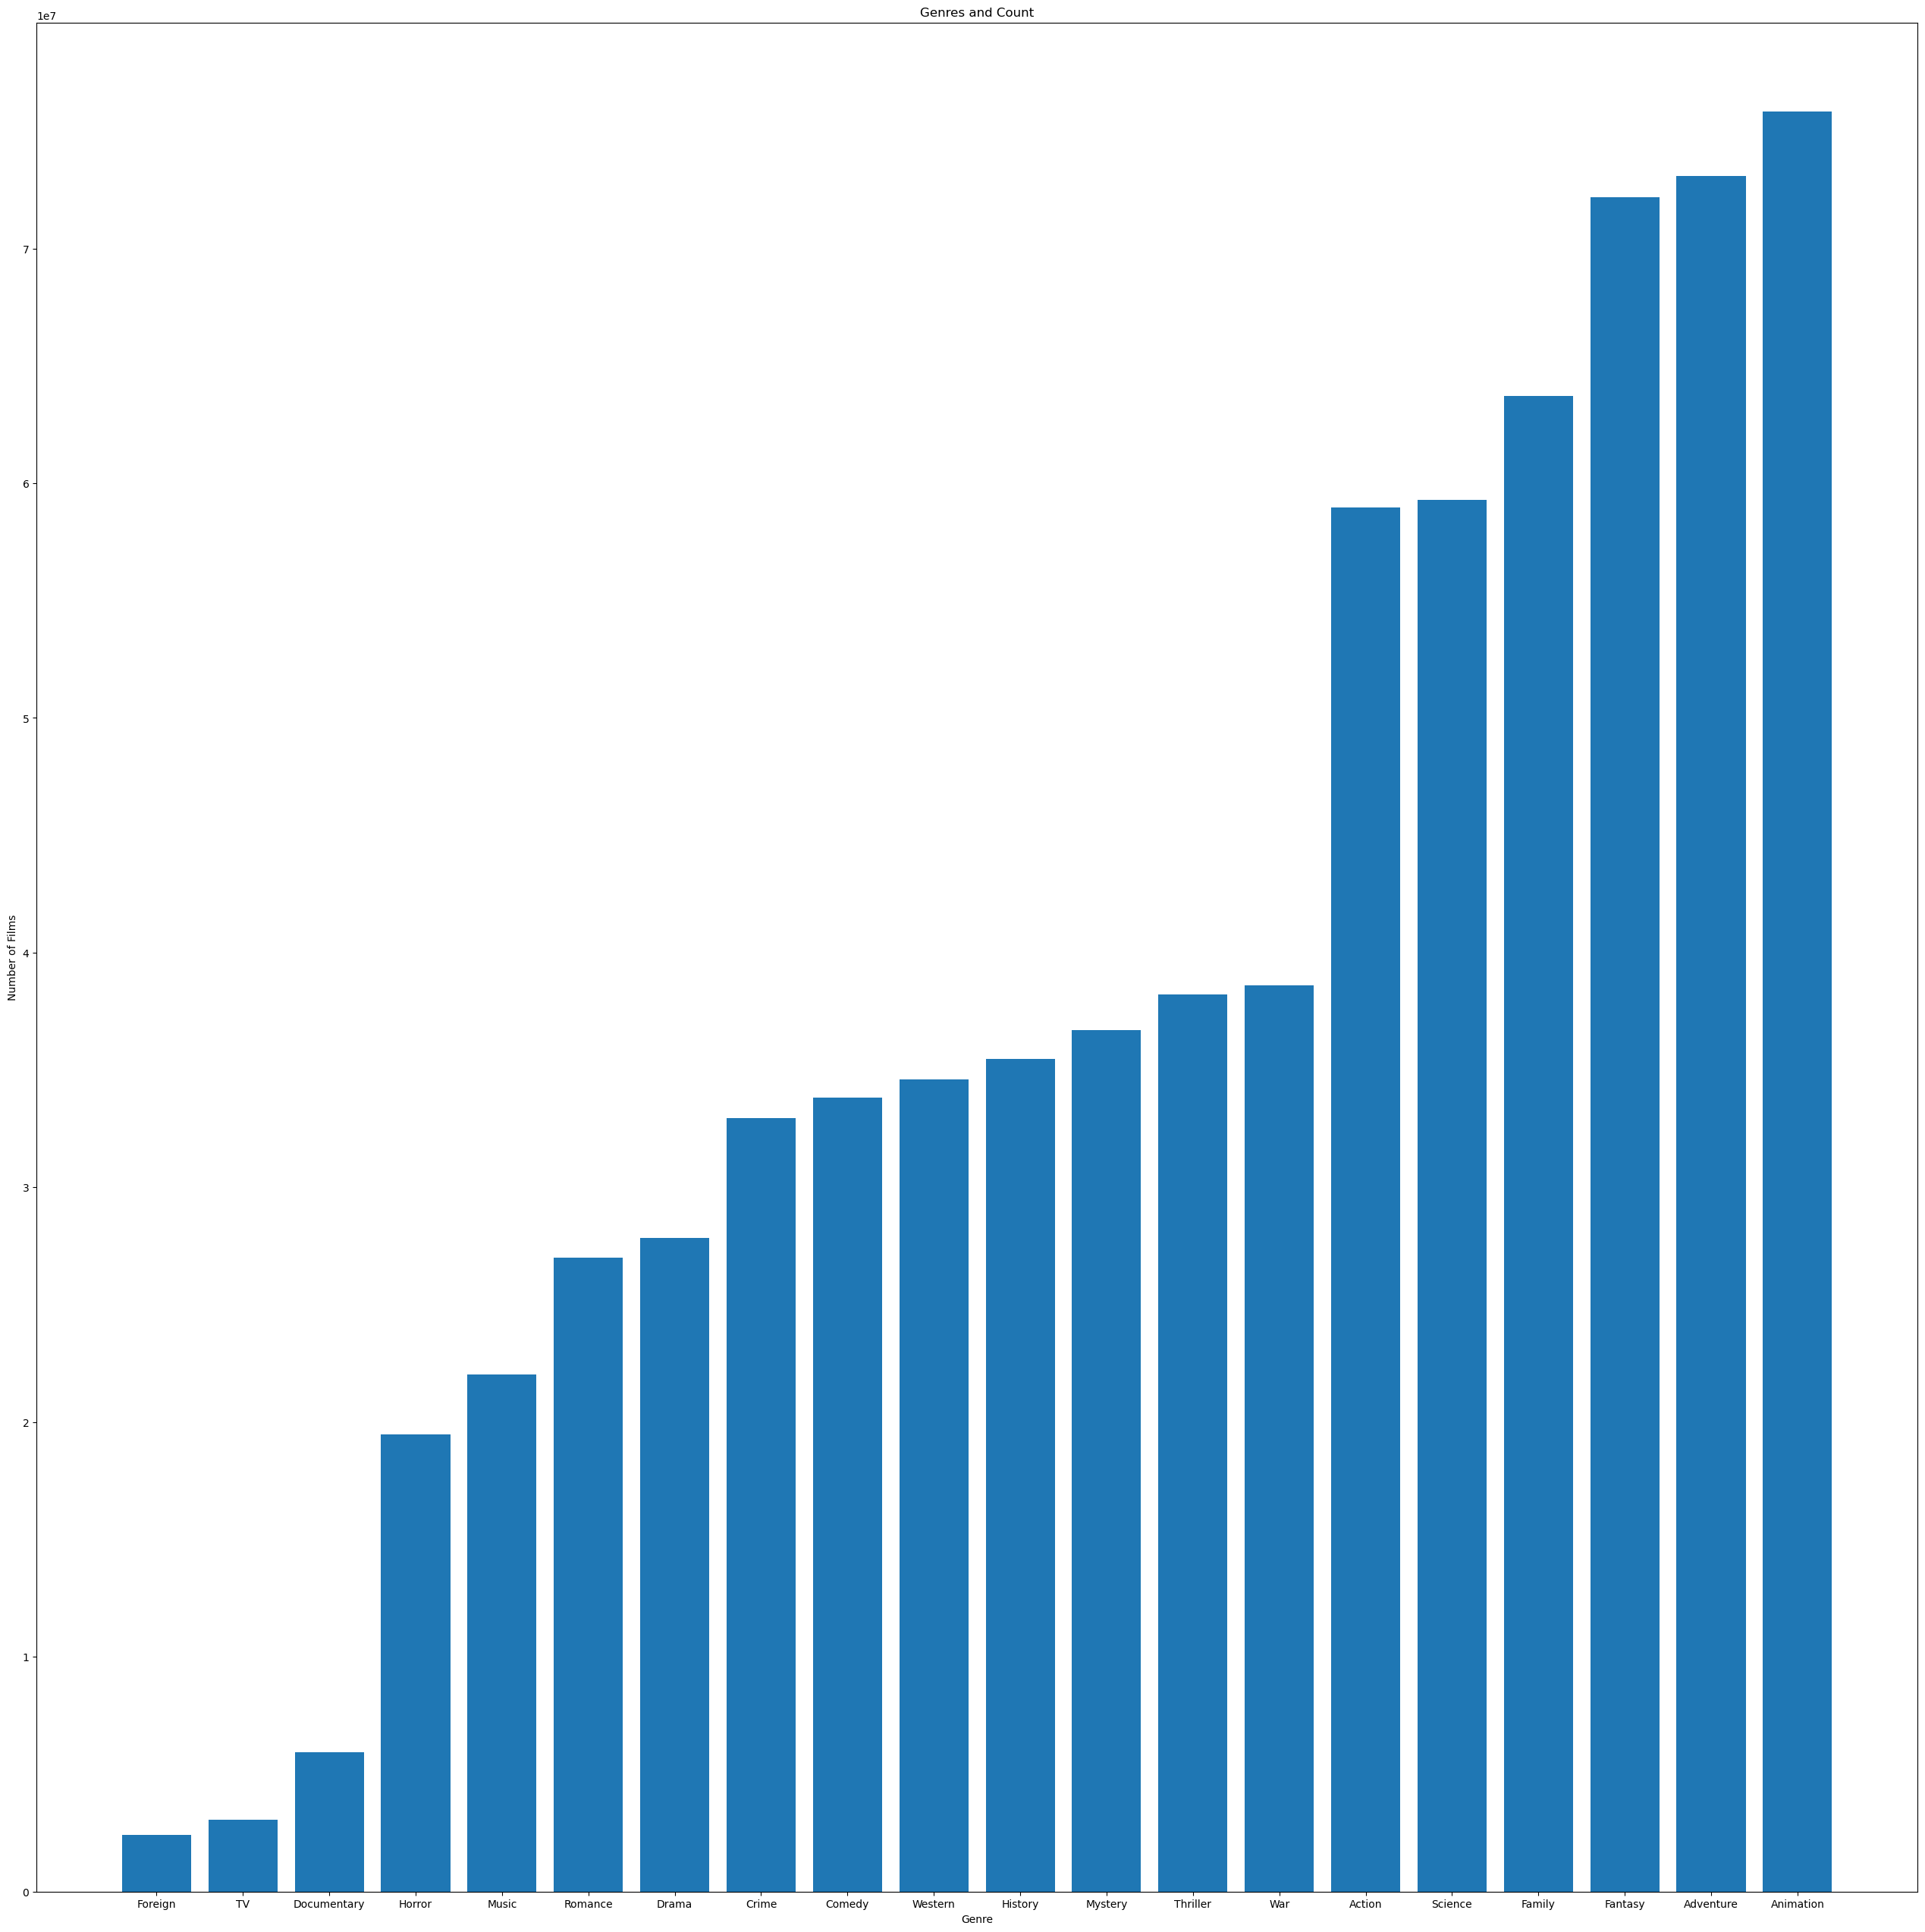

In [31]:
import matplotlib.pyplot as plt

# Sample dictionary with data
data_dict = genre_mean

# Extracting keys and values from the dictionary
labels = list(data_dict.keys())
values = list(data_dict.values())

# Creating a figure and axis
fig, ax = plt.subplots(figsize=(32,32))

# Creating a bar chart using the axis
ax.bar(labels, values)

# Adding labels and title
ax.set_xlabel('Genre')
ax.set_ylabel('Number of Films')
ax.set_title('Genres and Count')

# Displaying the bar chart
fig.savefig('./diagrams/genres/genre_count.png')


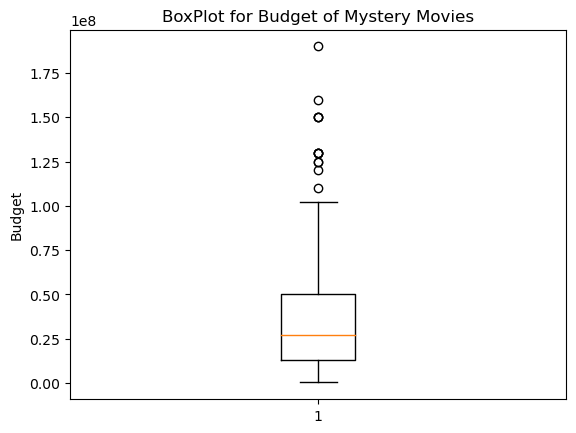

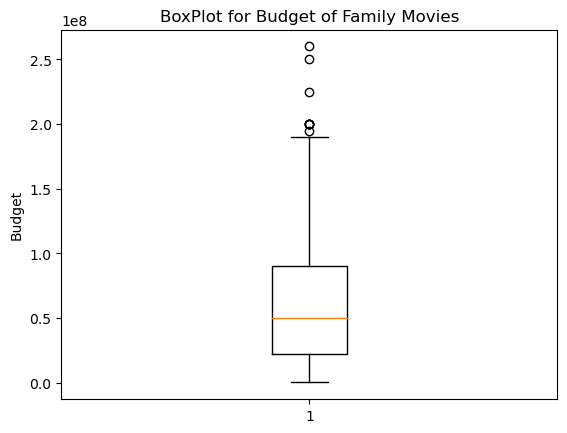

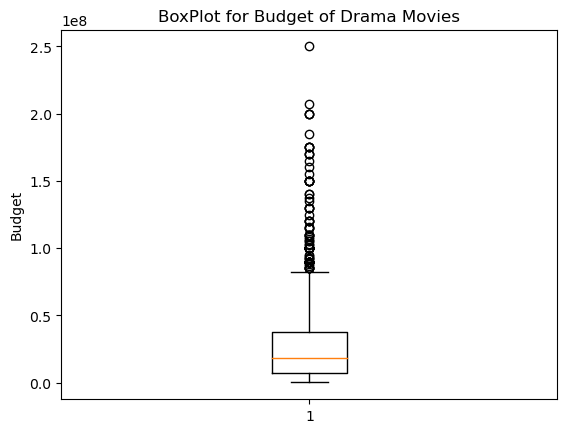

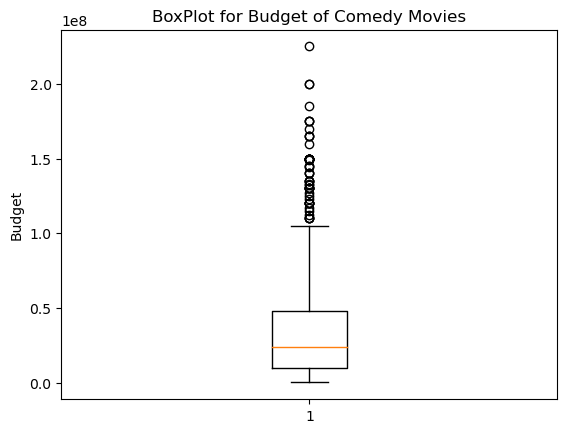

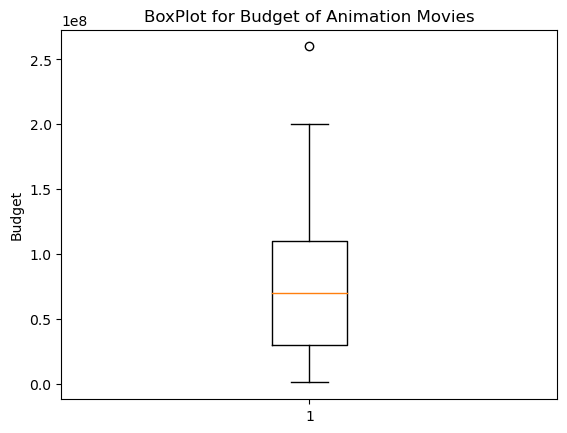

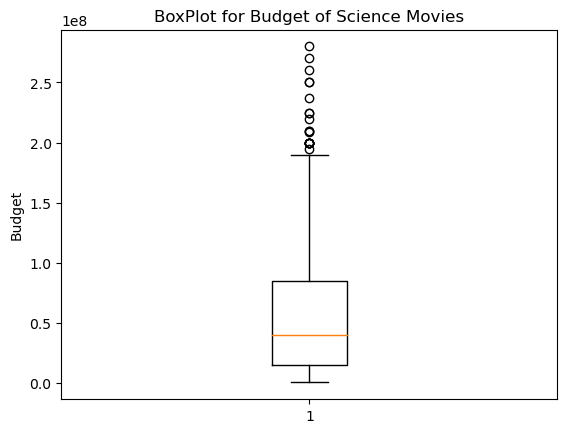

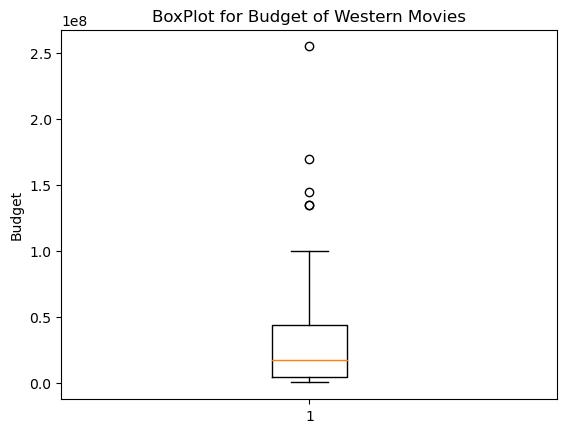

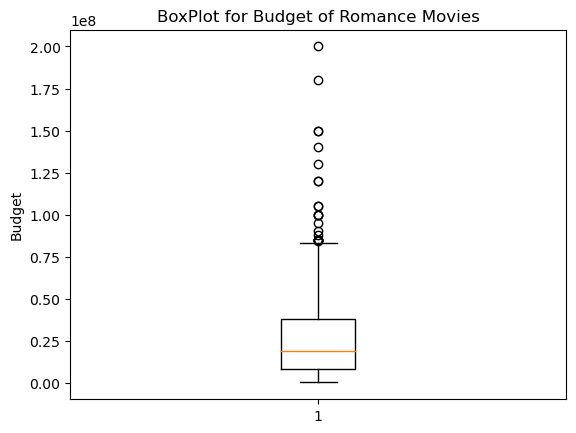

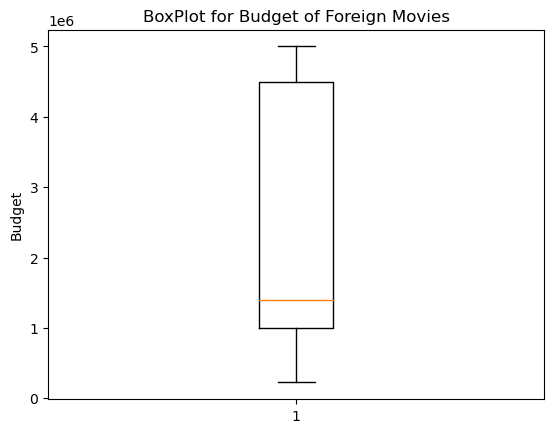

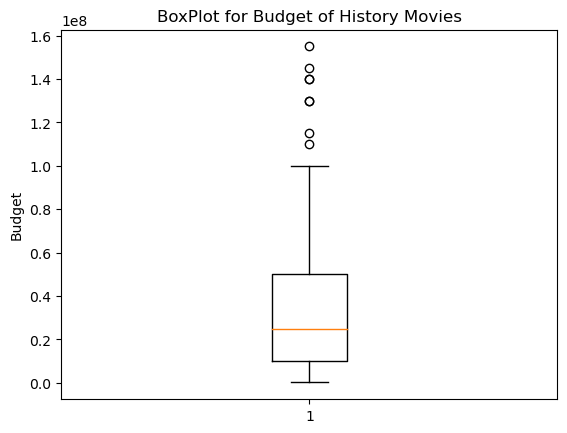

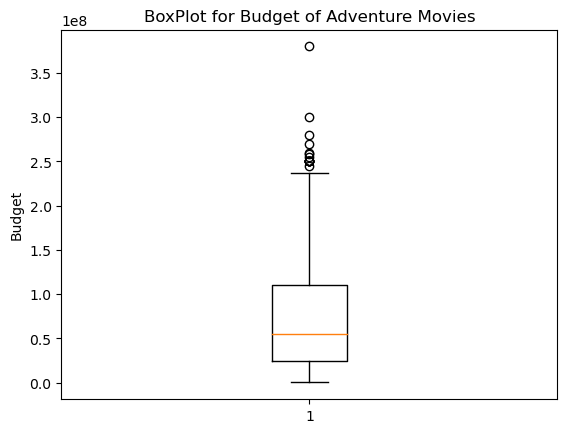

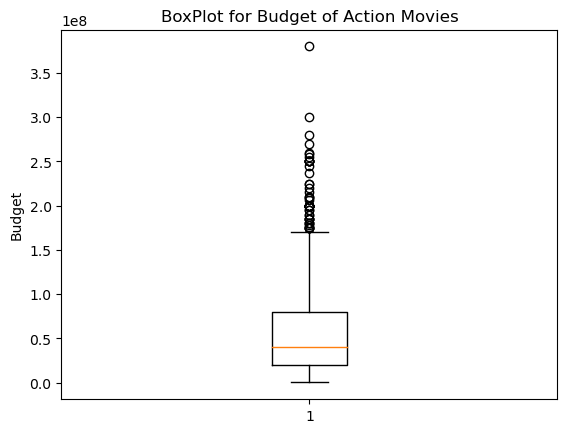

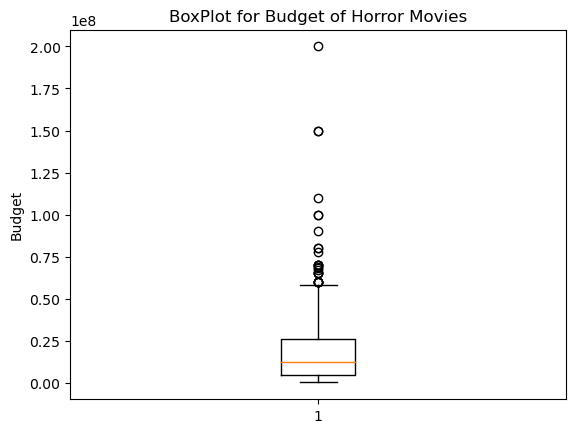

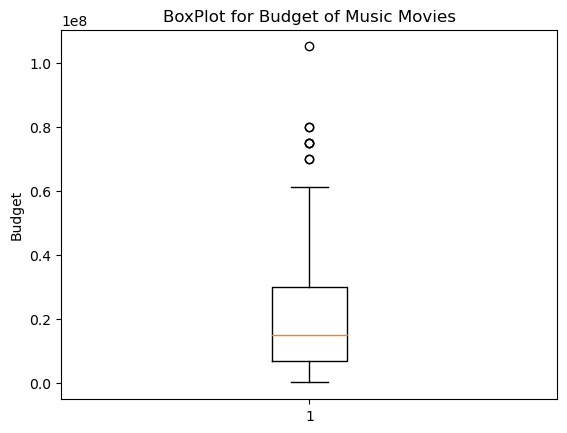

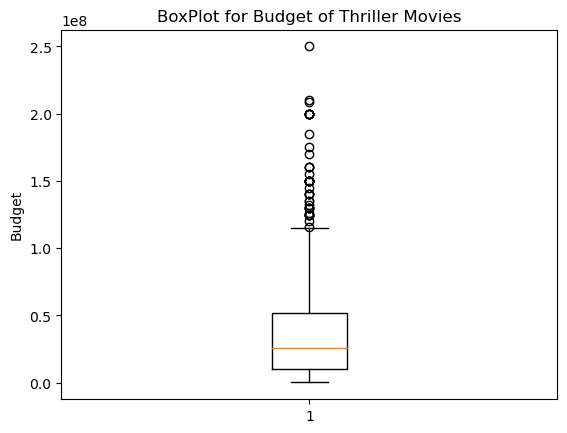

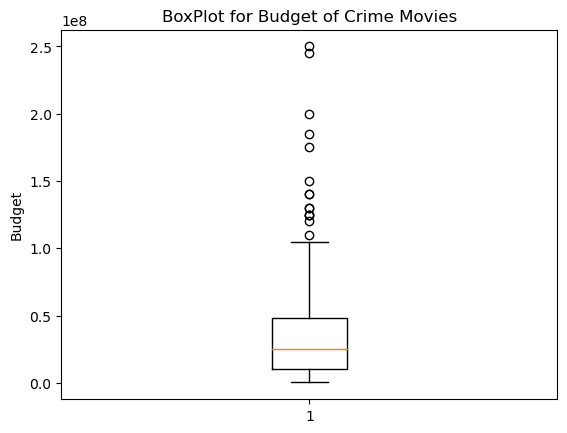

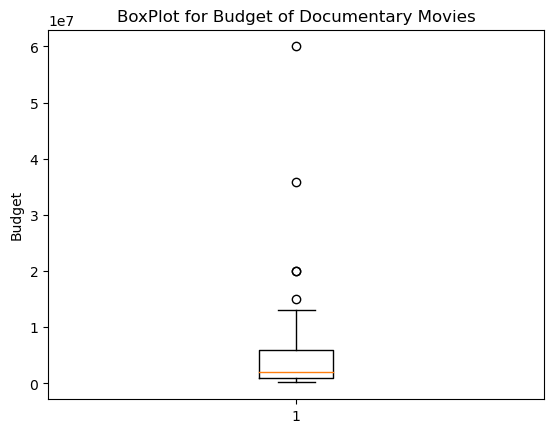

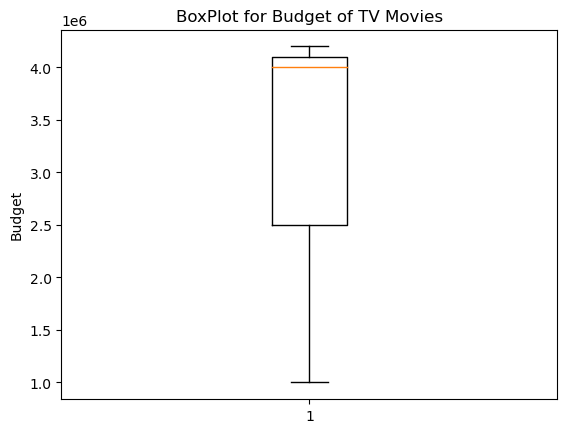

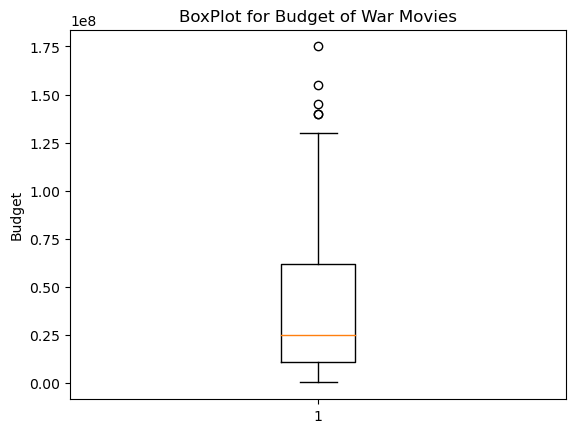

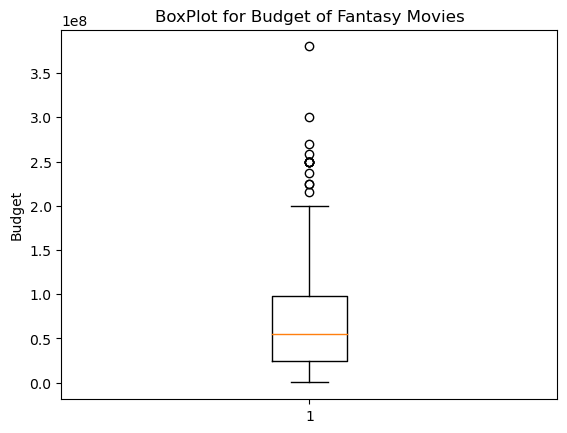

In [32]:
# boxplots for each genre bugdet
os.makedirs('./diagrams/genres/boxplots', exist_ok=True)
for genre in all_genres:
    fig, ax = plt.subplots()
    bin_size = 10000000
    ax.boxplot(df[df[genre]==1]['budget'])
    ax.set_title(f'BoxPlot for Budget of {genre} Movies')
    ax.set_ylabel('Budget')

    fig.savefig(f'./diagrams/genres/boxplots/budget_{genre}_boxplot.png');

# Companies and Budget

In [33]:
production_companies

[[],
 ['Paramount Pictures'],
 ['Universal Pictures'],
 ['Columbia Pictures'],
 ['New Line Cinema'],
 ['Metro-Goldwyn-Mayer (MGM)'],
 ['Twentieth Century Fox Film Corporation'],
 ['Warner Bros.'],
 ['Walt Disney Pictures'],
 ['Touchstone Pictures'],
 ['Columbia Pictures Corporation'],
 ['Dimension Films'],
 ['DreamWorks Animation'],
 ['Miramax Films'],
 ['Walt Disney Pictures', 'Pixar Animation Studios'],
 ['United Artists'],
 ['Walt Disney Pictures', 'Walt Disney Feature Animation'],
 ['Marvel Studios'],
 ['Blue Sky Studios', 'Twentieth Century Fox Animation'],
 ['Fox 2000 Pictures'],
 ['Imagine Entertainment', 'Universal Pictures'],
 ['United Artists', 'Eon Productions', 'Danjaq'],
 ['Eon Productions'],
 ['Hollywood Pictures', 'Cinergi Pictures Entertainment'],
 ['Fox Searchlight Pictures'],
 ['TriStar Pictures'],
 ['Hollywood Pictures'],
 ['DreamWorks SKG'],
 ['United Artists', 'Eon Productions'],
 ['Silver Pictures', 'Warner Bros.'],
 ['Universal Pictures', 'Amblin Entertainment'],

In [34]:
# generalize company

company = "Warner Bros."
def company_statistics(company):
    if(company not in pc_map):
        print("invalid company")
    indices = []
    for i in range(len(production_companies)):
        if company in production_companies[i]:
            indices.append(i)

    cdf = df.iloc[indices]
    print(company, "{:.3f} {:.3f} {:.3f}".format(cdf['budget'].mean(), cdf['budget'].std(), cdf['budget'].median()))

company_statistics(company)

Warner Bros. 35303359.684 40727973.872 20000000.000


In [35]:
# top 10 companies in terms of the maximum number of films
top_10_companies = ['Warner Bros.',
 'Universal Pictures',
 'Paramount Pictures',
 'Twentieth Century Fox Film Corporation',
 'Columbia Pictures',
 'New Line Cinema',
 'Relativity Media',
 'Metro-Goldwyn-Mayer (MGM)',
 'Touchstone Pictures',
 'Columbia Pictures Corporation']

In [36]:
# statistics for top to companies
print("company, mean, std, median")
for ttc in top_10_companies:
    company_statistics(ttc)
# top_10_companies

company, mean, std, median
Warner Bros. 35303359.684 40727973.872 20000000.000
Universal Pictures 38447092.511 42679322.089 25000000.000
Paramount Pictures 38131752.655 42073239.901 25000000.000
Twentieth Century Fox Film Corporation 39066198.848 42542437.349 23000000.000
Columbia Pictures 39144638.707 47013610.031 20000000.000
New Line Cinema 44337644.595 47853896.073 20000000.000
Relativity Media 32586938.776 33385324.617 20000000.000
Metro-Goldwyn-Mayer (MGM) 44159540.541 46799584.663 23000000.000
Touchstone Pictures 47996000.000 55284655.121 25000000.000
Columbia Pictures Corporation 38936184.211 41645504.438 23000000.000


In [37]:
# barchart for number of films for top 10 companies
company_freq_10 = {}
for ttc in top_10_companies:
    company_freq_10[ttc] = pc_map[ttc]
company_freq_10 = dict(sorted(company_freq_10.items(), key=lambda item: item[1]))
company_freq_10

{'Metro-Goldwyn-Mayer (MGM)': 74,
 'Touchstone Pictures': 75,
 'Columbia Pictures Corporation': 76,
 'Relativity Media': 98,
 'New Line Cinema': 111,
 'Columbia Pictures': 133,
 'Twentieth Century Fox Film Corporation': 171,
 'Paramount Pictures': 200,
 'Universal Pictures': 227,
 'Warner Bros.': 253}

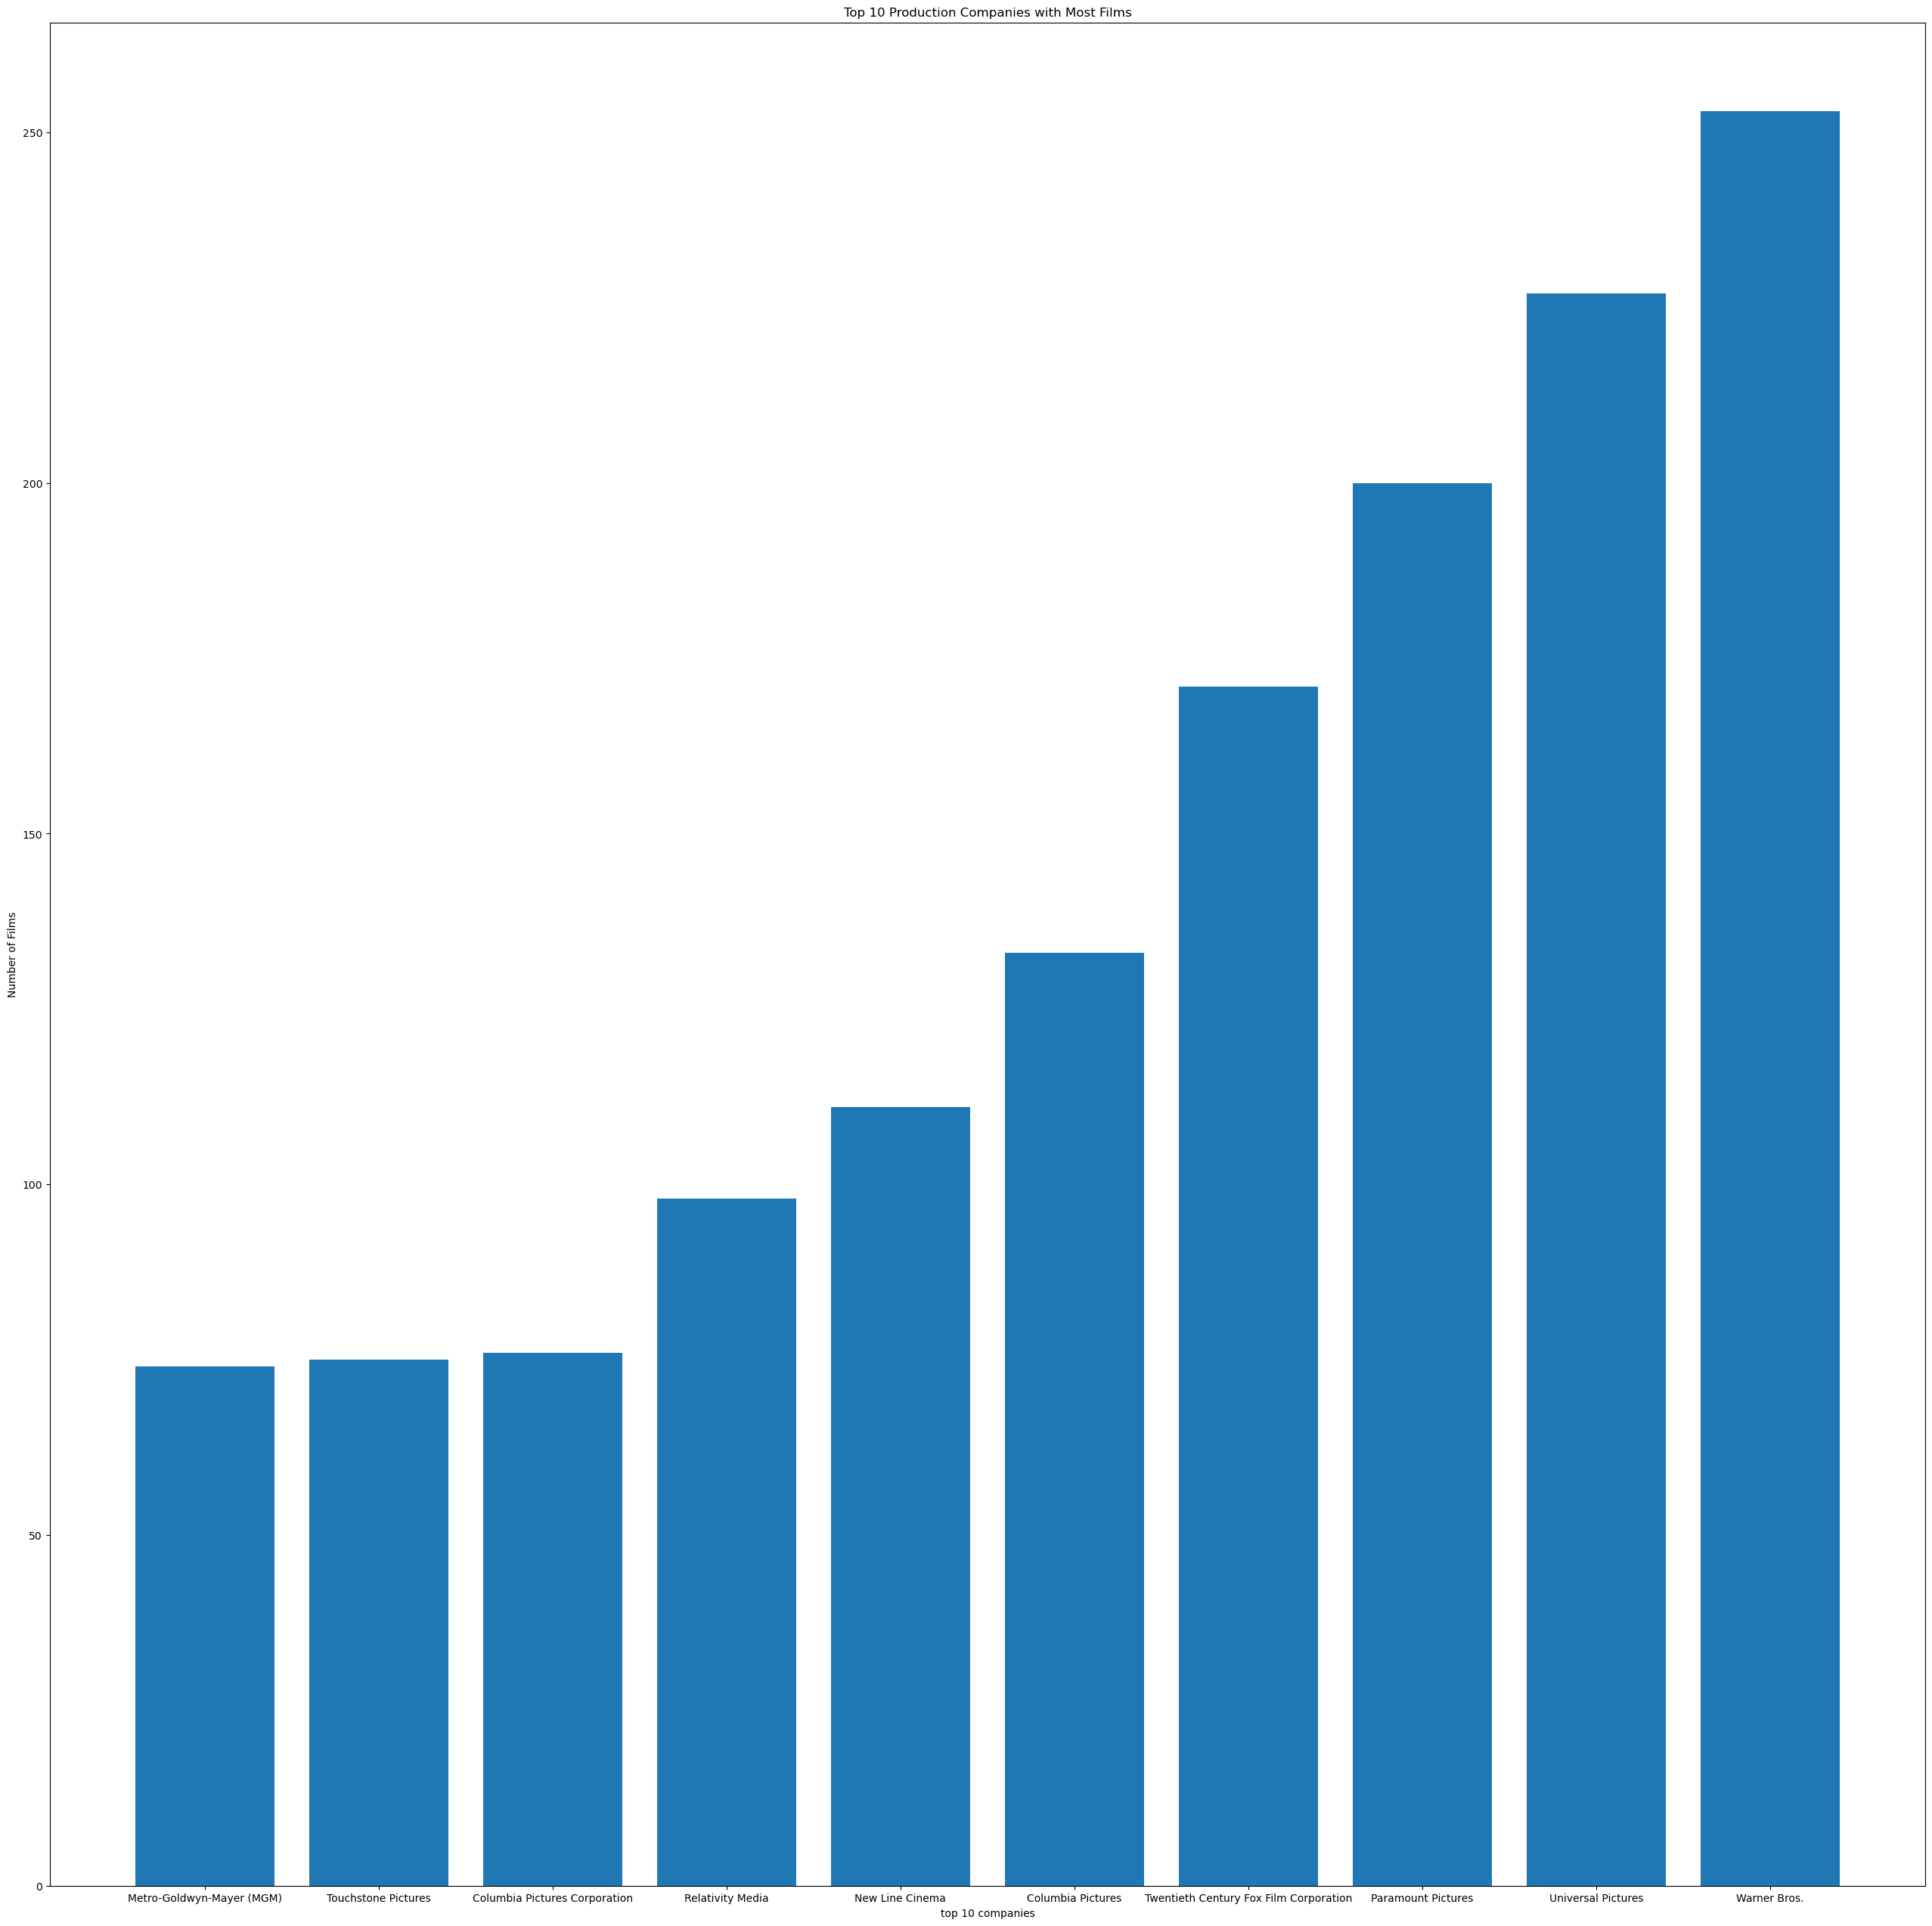

In [38]:
import matplotlib.pyplot as plt

# Sample dictionary with data
data_dict = company_freq_10

# Extracting keys and values from the dictionary
labels = list(data_dict.keys())
values = list(data_dict.values())

# Creating a figure and axis
fig, ax = plt.subplots(figsize=(32,32))

# Creating a bar chart using the axis
ax.bar(labels, values)

# Adding labels and title
ax.set_xlabel('top 10 companies')
ax.set_ylabel('Number of Films')
ax.set_title('Top 10 Production Companies with Most Films')

# Displaying the bar chart
os.makedirs("./diagrams/companies", exist_ok=True)
fig.savefig('./diagrams/companies/companies_frequency.png')


In [39]:
# histogram of mean budget of top 10 companies
def company_mean_budget(company):
    if(company not in pc_map):
        print("invalid company")
    indices = []
    for i in range(len(production_companies)):
        if company in production_companies[i]:
            indices.append(i)

    cdf = df.iloc[indices]
    return cdf['budget'].mean()


In [40]:
# genre and mean budget barchart
company_means = {}
for c in top_10_companies:
    company_means[c] = company_mean_budget(c)
company_means = dict(sorted(company_means.items(), key=lambda item: item[1]))
company_means

{'Relativity Media': 32586938.775510203,
 'Warner Bros.': 35303359.68379447,
 'Paramount Pictures': 38131752.655,
 'Universal Pictures': 38447092.51101322,
 'Columbia Pictures Corporation': 38936184.21052632,
 'Twentieth Century Fox Film Corporation': 39066198.847953215,
 'Columbia Pictures': 39144638.70676692,
 'Metro-Goldwyn-Mayer (MGM)': 44159540.54054054,
 'New Line Cinema': 44337644.5945946,
 'Touchstone Pictures': 47996000.0}

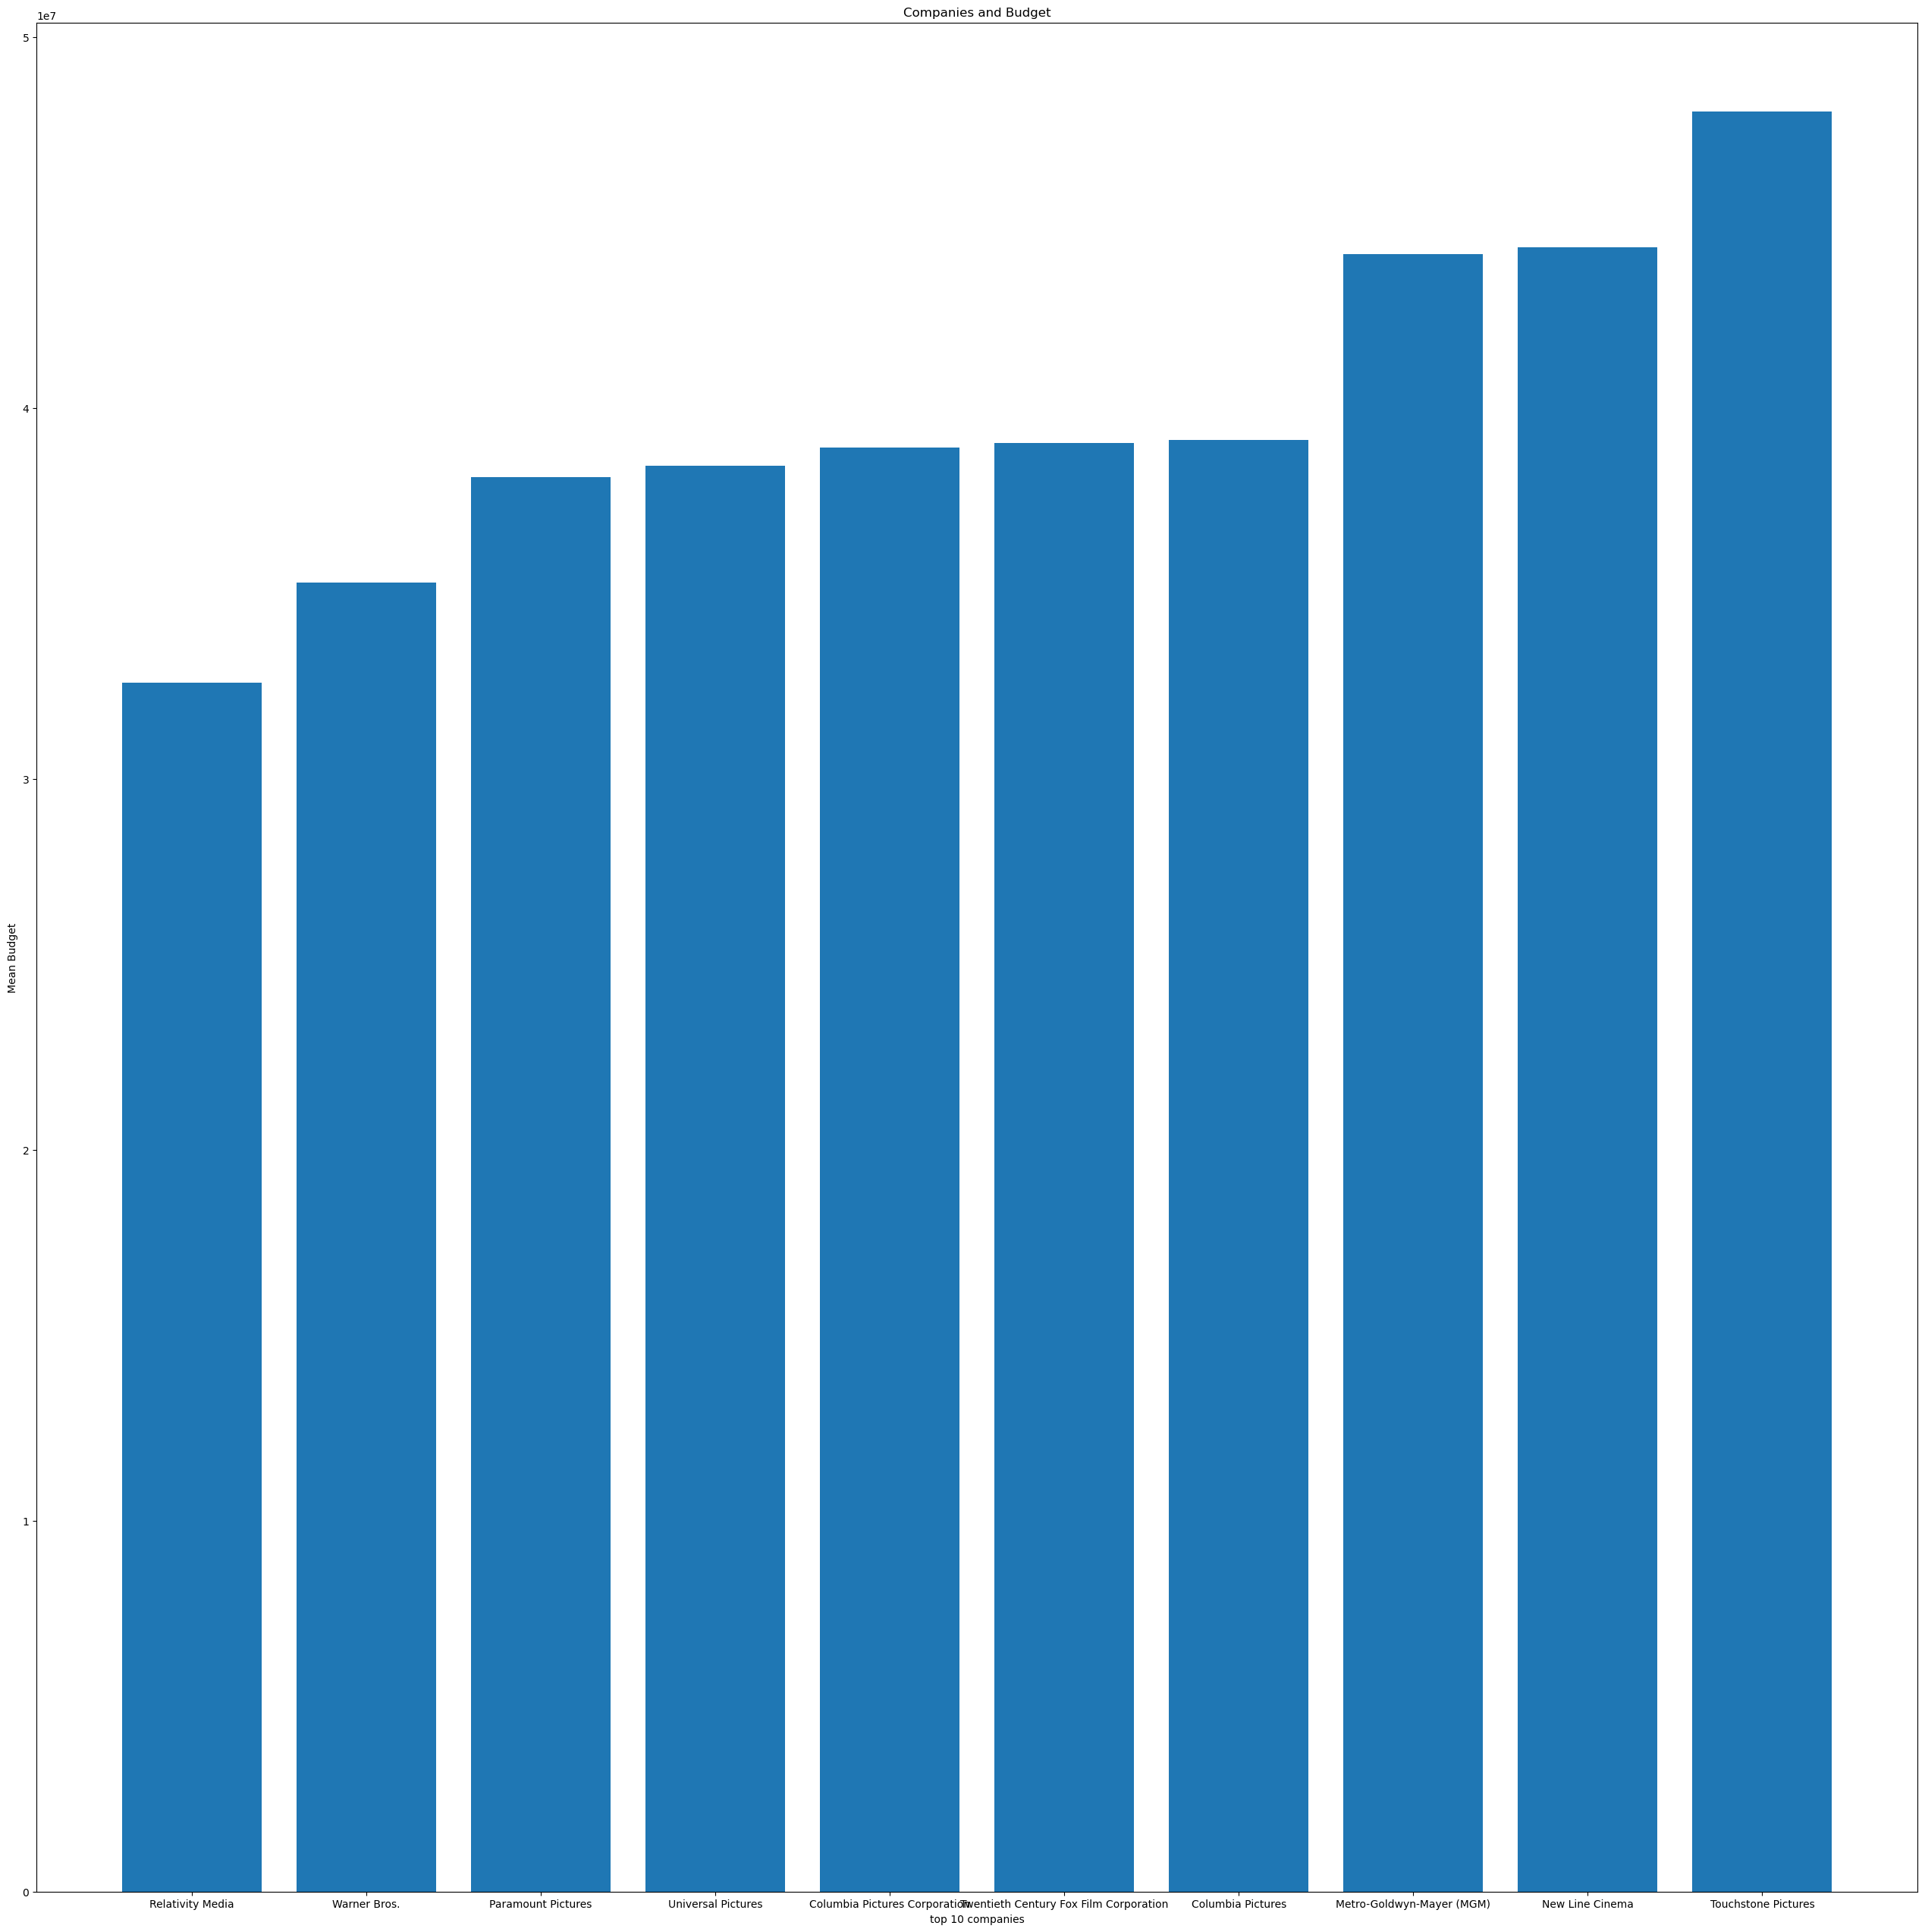

In [41]:
import matplotlib.pyplot as plt

# Sample dictionary with data
data_dict = company_means

# Extracting keys and values from the dictionary
labels = list(data_dict.keys())
values = list(data_dict.values())

# Creating a figure and axis
fig, ax = plt.subplots(figsize=(32,32))

# Creating a bar chart using the axis
ax.bar(labels, values)

# Adding labels and title
ax.set_xlabel('top 10 companies')
ax.set_ylabel('Mean Budget')
ax.set_title('Companies and Budget')

# Displaying the bar chart
os.makedirs("./diagrams/companies", exist_ok=True)
fig.savefig('./diagrams/companies/companies_mean.png')


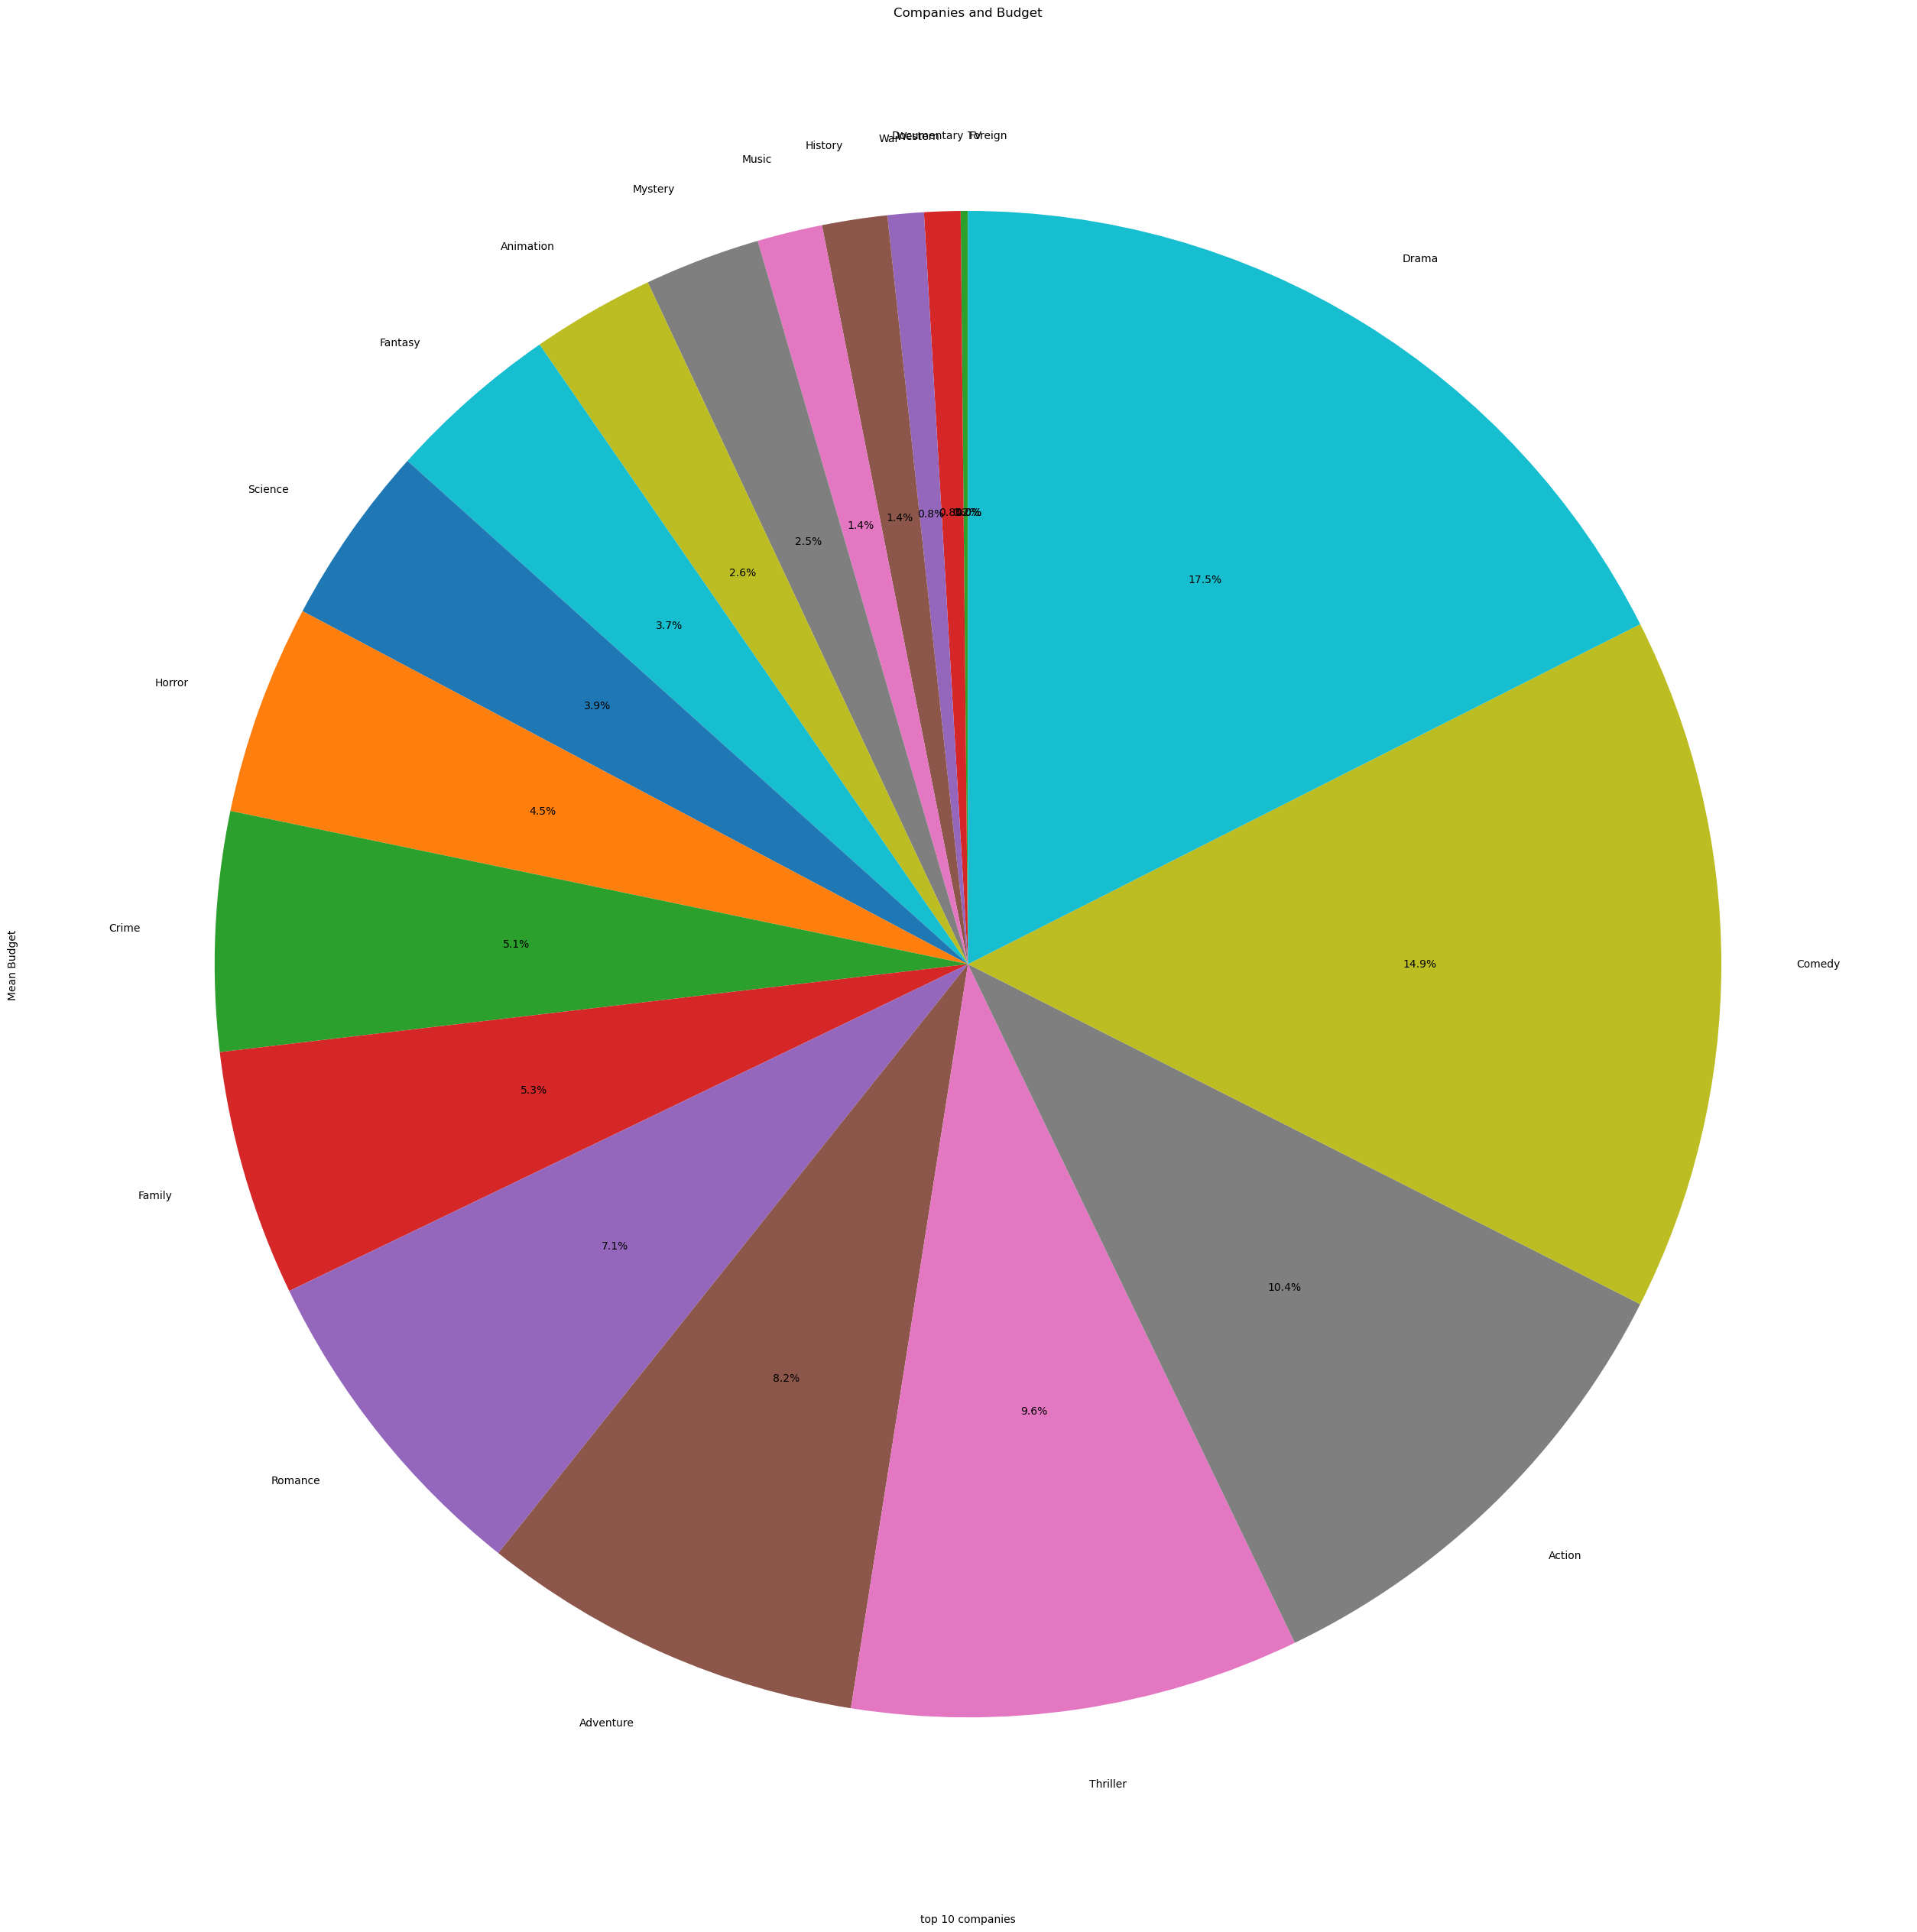

In [42]:
# generalize company genre pie chart

company = "Warner Bros."
os.makedirs("./diagrams/companies/genre_piecharts", exist_ok=True)

def company_pie(company):
    if(company not in pc_map):
        print("invalid company")
    indices = []
    for i in range(len(production_companies)):
        if company in production_companies[i]:
            indices.append(i)

    cdf = df.iloc[indices]
    
    gcc = {} # genre company count
    for gen in all_genres:
        gcc[gen] = cdf[gen].sum()
    gcc = dict(sorted(gcc.items(), key=lambda item: item[1]))
    
    # Sample dictionary with data
    data_dict = gcc

    # Extracting keys and values from the dictionary
    labels = list(data_dict.keys())
    values = list(data_dict.values())

    # Creating a figure and axis
    fig, ax = plt.subplots(figsize=(32,32))

    # Creating a bar chart using the axis
    ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
    

    # Adding labels and title
    ax.set_xlabel('top 10 companies')
    ax.set_ylabel('Mean Budget')
    ax.set_title('Companies and Budget')

    # Displaying the bar chart
    fig.savefig(f'./diagrams/companies/genre_piecharts/{company}_pie.png')
#     print(company, "{:.3f} {:.3f} {:.3f}".format(cdf['budget'].mean(), cdf['budget'].std(), cdf['budget'].median()))

company_pie(company)

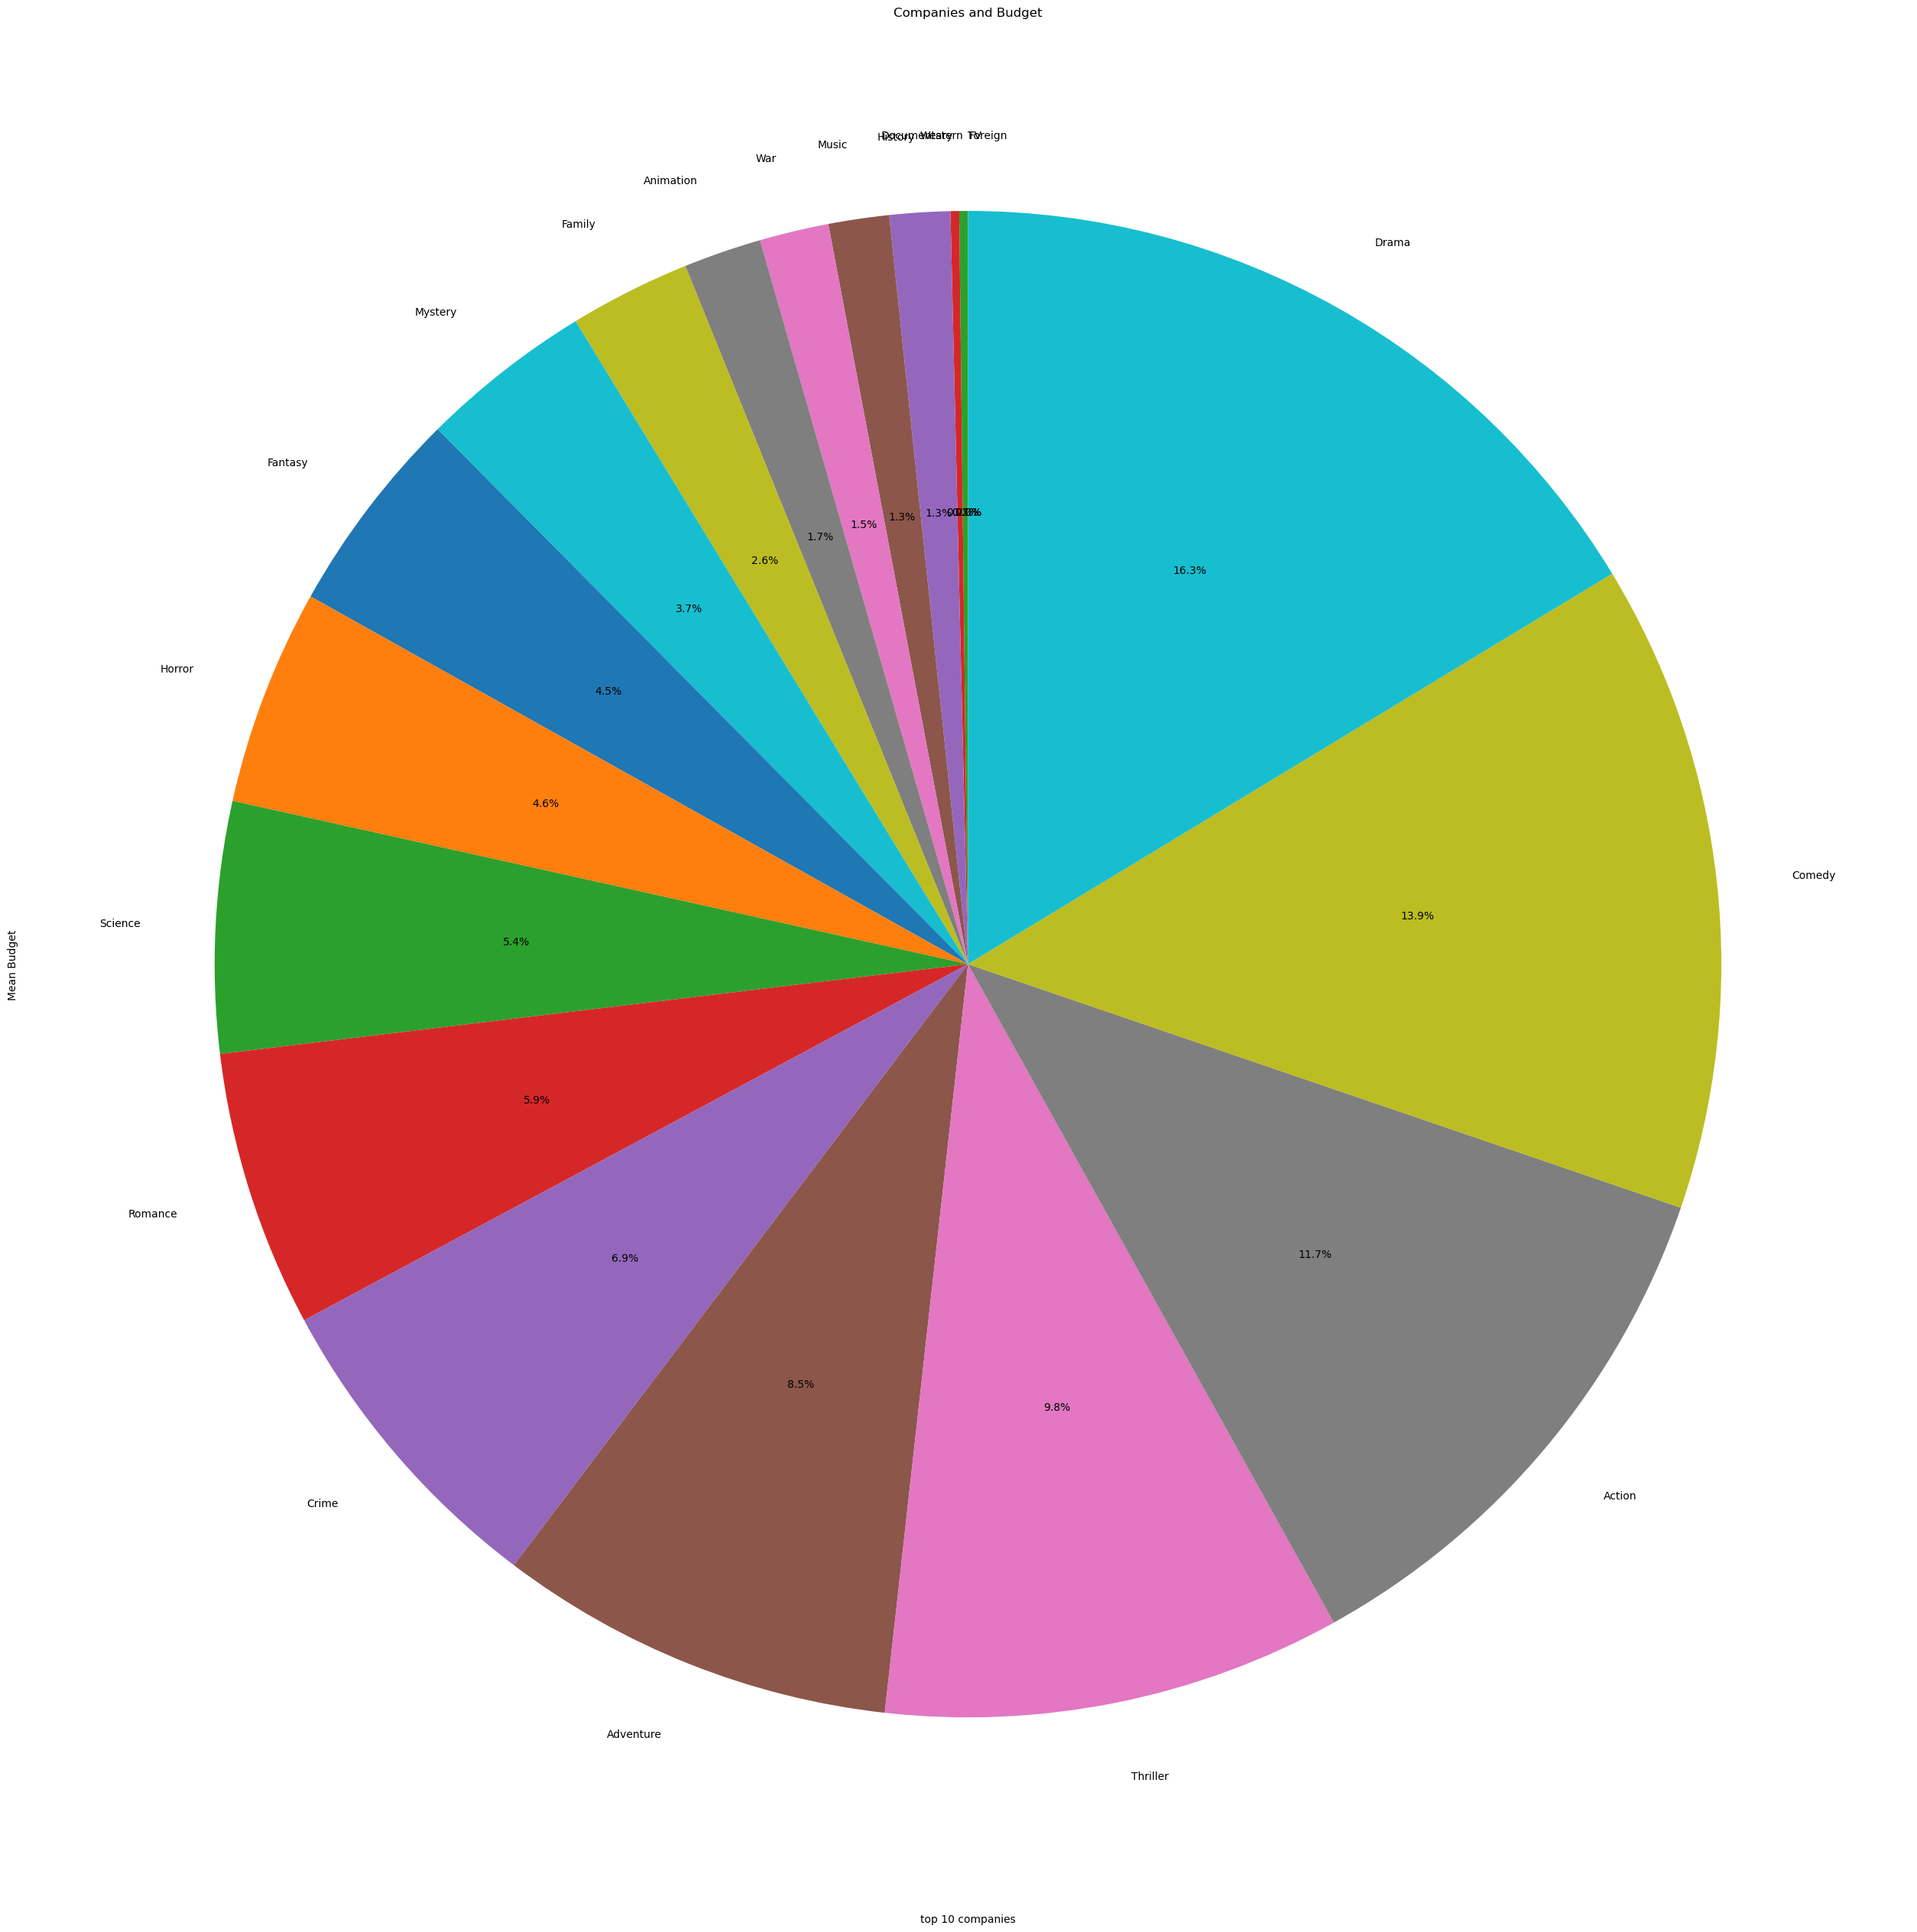

In [43]:
company_pie('Paramount Pictures')

## Correlation Matrix on Genres

## Directors and Budget

In [44]:
# we will consider our favourite Christopher Nolan
my_director = "Christopher Nolan"

In [45]:
# subsetting the dataframe
ddf = df[df['director'] == my_director]
ddf

original_title     budget           director  Mystery  Family  \
3     The Dark Knight Rises  250000000  Christopher Nolan        0       0   
65          The Dark Knight  185000000  Christopher Nolan        0       0   
95             Interstellar  165000000  Christopher Nolan        0       0   
96                Inception  160000000  Christopher Nolan        1       0   
119           Batman Begins  150000000  Christopher Nolan        0       0   
1033               Insomnia   46000000  Christopher Nolan        1       0   
1196           The Prestige   40000000  Christopher Nolan        1       0   
3573                Memento    9000000  Christopher Nolan        1       0   

      Drama  Comedy  Animation  Science  Western  ...  Adventure  Action  \
3         1       0          0        0        0  ...          0       1   
65        1       0          0        0        0  ...          0       1   
95        1       0          0        1        0  ...          1       0   
96        0       0          0        1        0  ...          1       1   
119       1       0          0        0        0  ...          0       1   
1033      0       0          0        0        0  ...          0       0   
1196      1       0          0        0        0  ...          0       0   
3573      0       0          0        0        0  ...          0       0   

      Horror  Music  Thriller  Crime  Documentary  TV  War  Fantasy  
3          0      0         1      1            0   0    0        0  
65         0      0         1      1            0   0    0        0  
95         0      0         0      0            0   0    0        0  
96         0      0         1      0            0   0    0        0  
119        0      0         0      1            0   0    0        0  
1033       0      0         1      1            0   0    0        0  
1196       0      0         1      0            0   0    0        0  
3573       0      0         1      0            0   0    0        0  

[8 rows x 23 columns]

In [46]:
# number of films
print(f"{my_director} has directed {len(ddf)} films")

Christopher Nolan has directed 8 films


In [47]:
# fundamental statistics of budget
ddf['budget'].describe()

count    8.000000e+00
mean     1.256250e+08
std      8.417149e+07
min      9.000000e+06
25%      4.450000e+07
50%      1.550000e+08
75%      1.700000e+08
max      2.500000e+08
Name: budget, dtype: float64

In [48]:
# genre and Christopher Nolan
dgen = {}   # dirctor and genre map
for gen in all_genres:
    if(ddf[gen].sum() > 0):
        dgen[gen] = ddf[gen].sum()

dgen = dict(sorted(dgen.items(), key=lambda item: item[1]))
dgen

{'Science': 2,
 'Adventure': 2,
 'Mystery': 4,
 'Action': 4,
 'Crime': 4,
 'Drama': 5,
 'Thriller': 6}

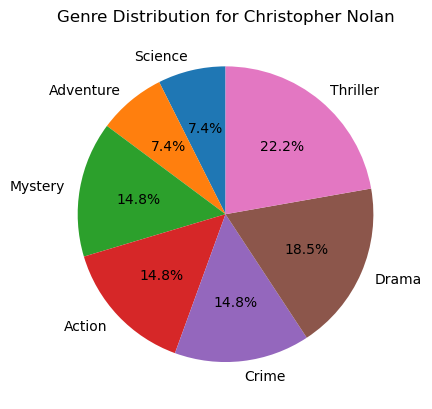

In [49]:
data_dict = dgen

# Extracting keys and values from the dictionary
labels = list(data_dict.keys())
sizes = list(data_dict.values())

# Creating a figure and axis
fig, ax = plt.subplots()

# Creating a pie chart using the axis
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Adding a title
ax.set_title(f'Genre Distribution for {my_director}')

# Displaying the pie chart
os.makedirs('./diagrams/directors/', exist_ok=True)
fig.savefig('./diagrams/directors/genre_pie.png');


In [50]:
# genre and budget for christofer nolan
dbgen = {}   # dirctor,buget and genre map
for gen in all_genres:
    if(ddf[gen].sum() > 0):
        dbgen[gen] = ddf[ddf[gen] == 1]["budget"].mean()

dbgen = dict(sorted(dbgen.items(), key=lambda item: item[1]))
dbgen

{'Mystery': 63750000.0,
 'Thriller': 115000000.0,
 'Crime': 157750000.0,
 'Drama': 158000000.0,
 'Science': 162500000.0,
 'Adventure': 162500000.0,
 'Action': 186250000.0}

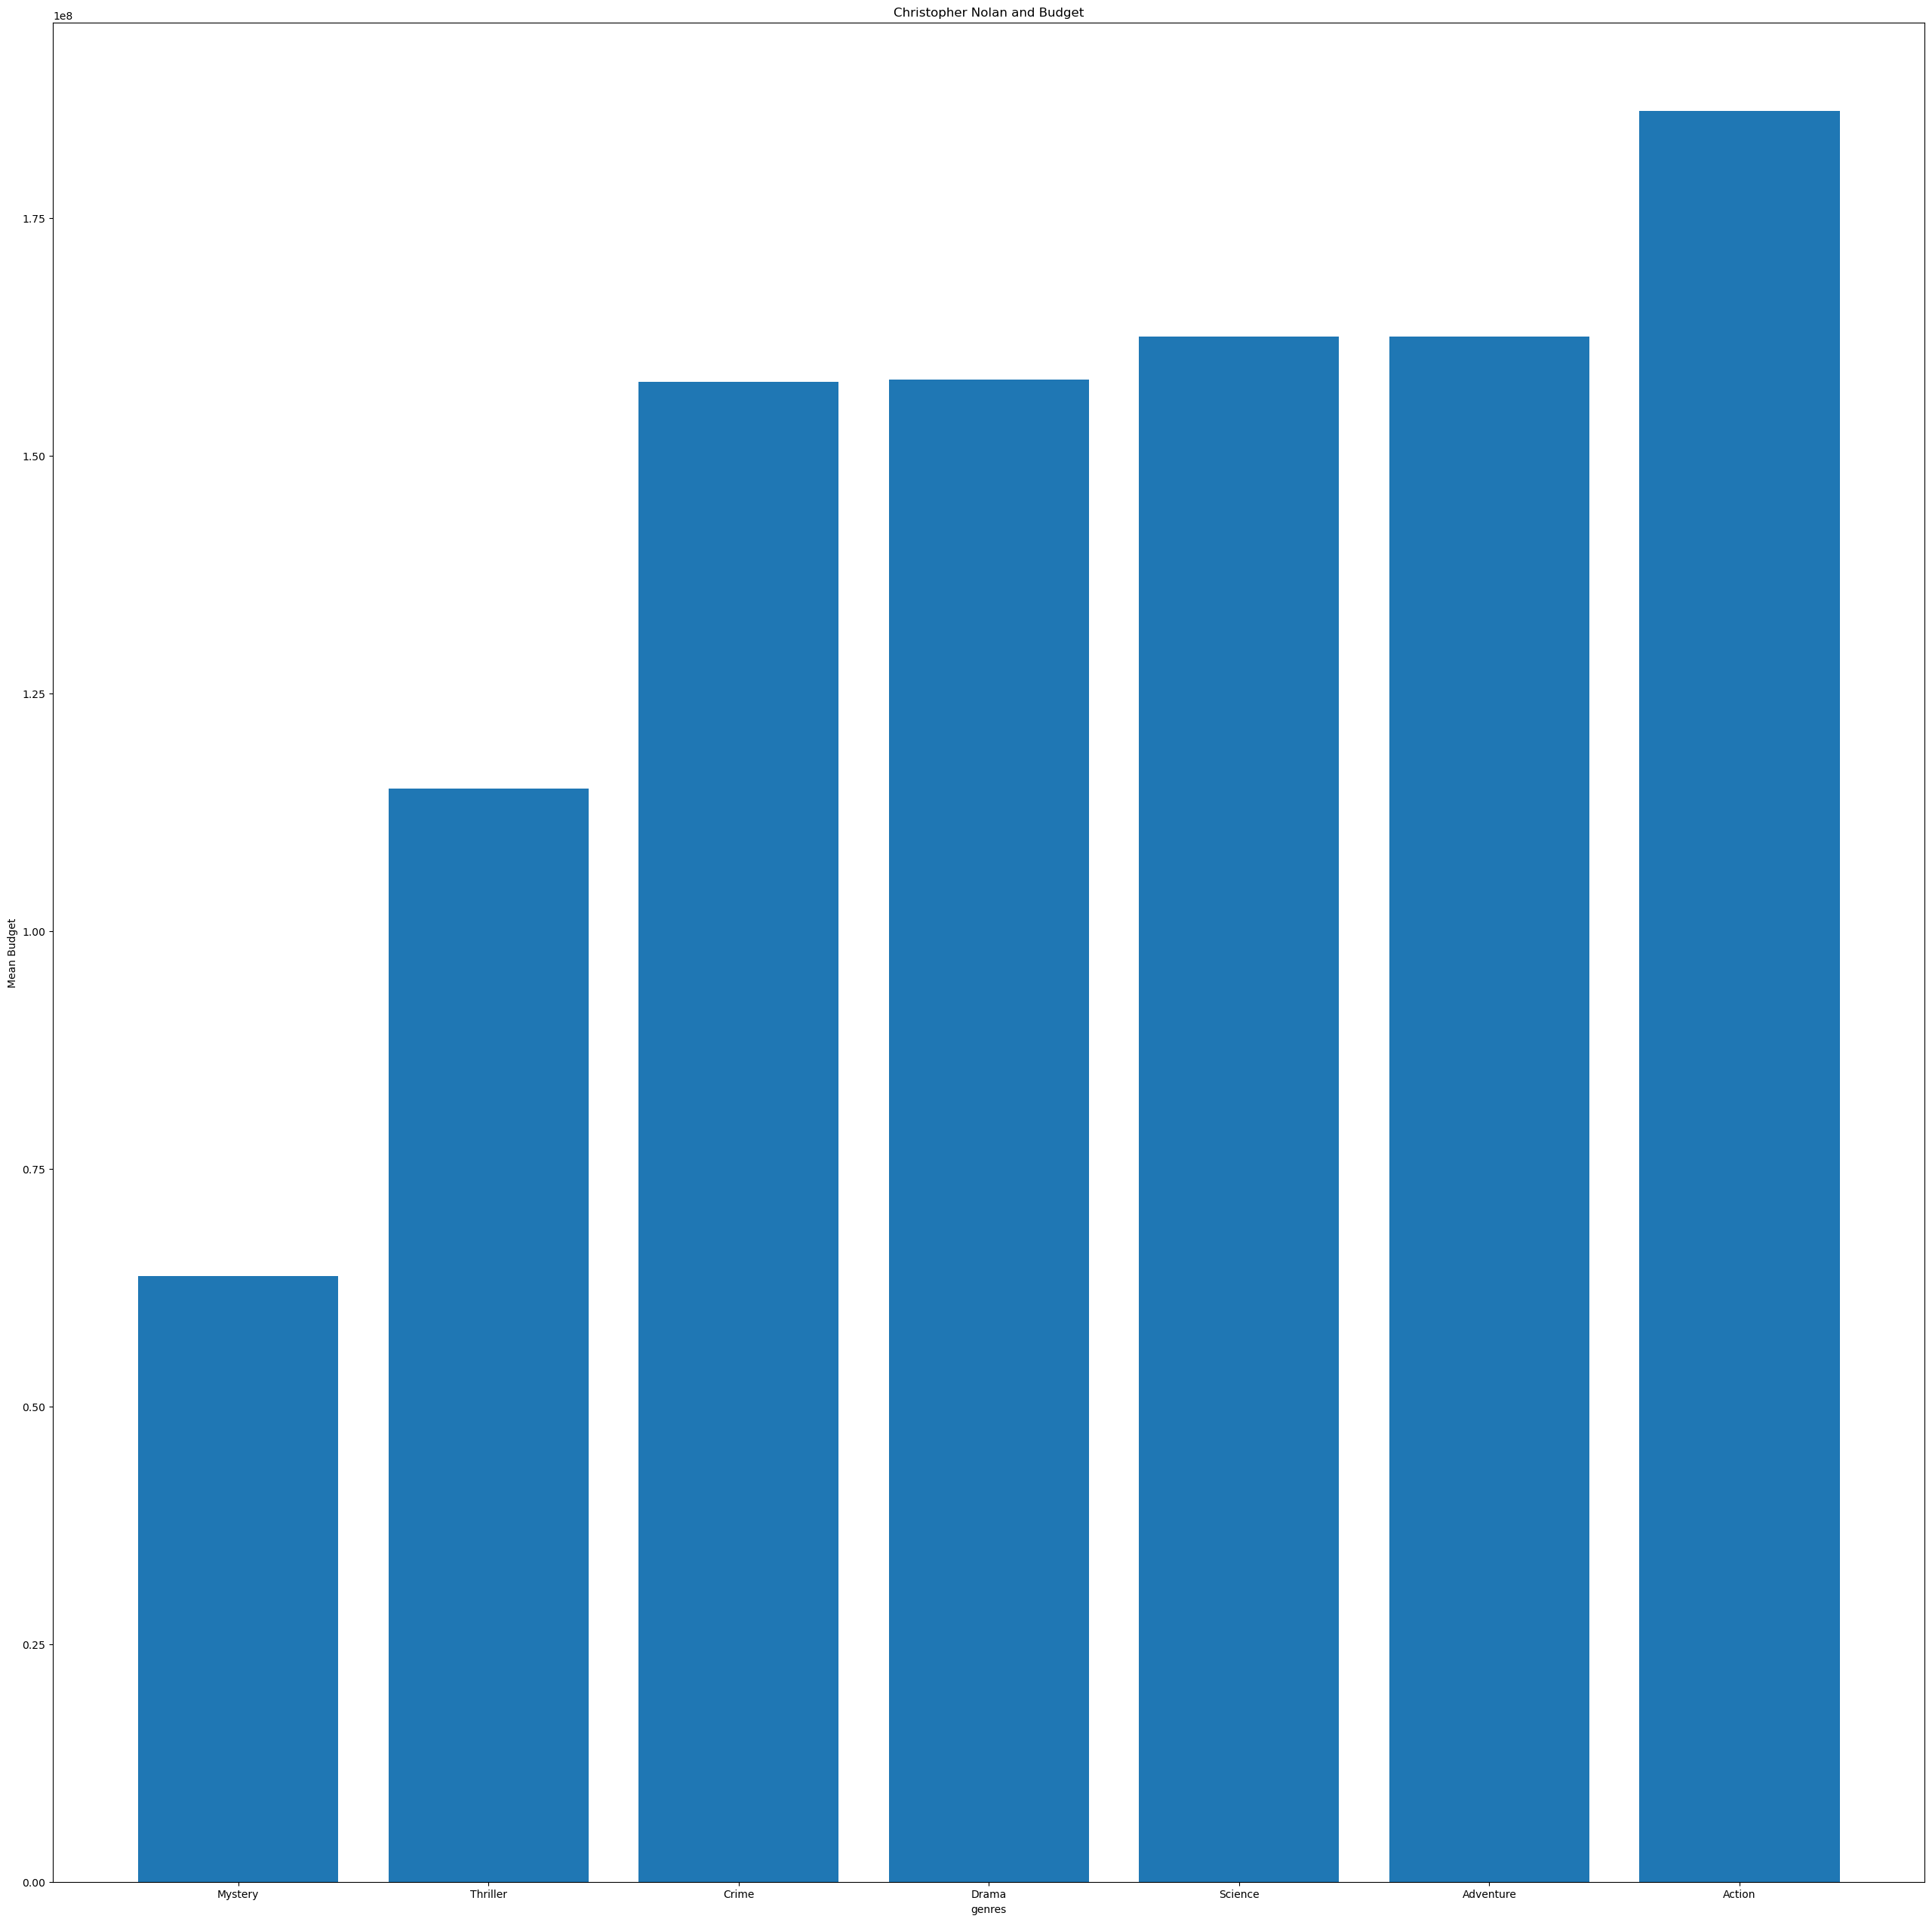

In [51]:
data_dict = dbgen

# Extracting keys and values from the dictionary
labels = list(data_dict.keys())
values = list(data_dict.values())

fig, ax = plt.subplots(figsize=(32,32))

# Creating a bar chart using the axis
ax.bar(labels, values)

# Adding labels and title
ax.set_xlabel('genres')
ax.set_ylabel('Mean Budget')
ax.set_title(f'{my_director} and Budget')

# Displaying the pie chart
os.makedirs('./diagrams/directors/', exist_ok=True)
fig.savefig('./diagrams/directors/genre_mean_hist.png');


In [52]:
# we made a treemap for all the films of Christopher nolan in Tableau
ddf.to_excel("./cn_parsed.xlsx")